# Hyperparameter Tuning in Python

# DATACAMP

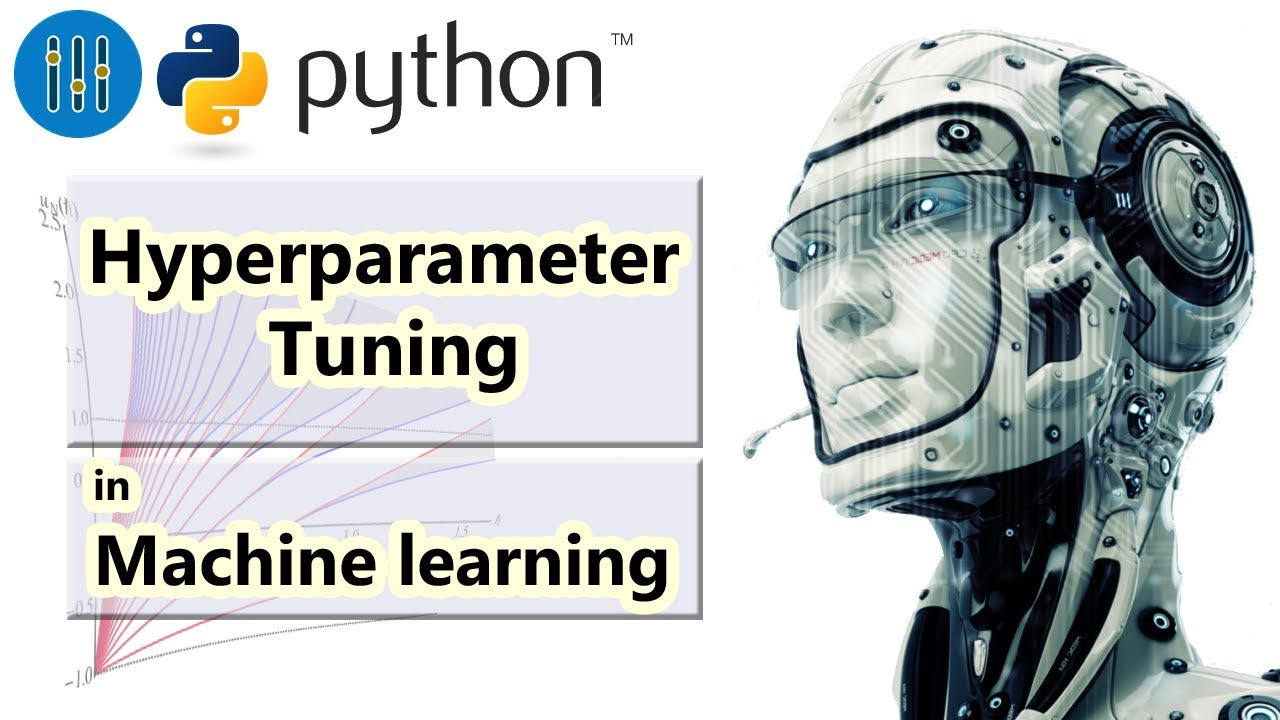

In [9]:
from IPython.display import Image
Image('ht.jpg')

# Course Description
Building powerful machine learning models depends heavily on the set of hyperparameters used. But with increasingly complex models with lots of options, how do you efficiently find the best settings for your particular problem? In this course you will get practical experience in using some common methodologies for automated hyperparameter tuning in Python using Scikit Learn. These include Grid Search, Random Search & advanced optimization methodologies including Bayesian & Genetic algorithms . You will use a dataset predicting credit card defaults as you build skills to dramatically increase the efficiency and effectiveness of your machine learning model building.


# 1.Hyperparameters and Parameters

In this introductory chapter you will learn the difference between hyperparameters and parameters. You will practice extracting and analyzing parameters, setting hyperparameter values for several popular machine learning algorithms. Along the way you will learn some best practice tips & tricks for choosing which hyperparameters to tune and what values to set & build learning curves to analyze your hyperparameter choices.



In [1]:
# Extracting a Logistic Regression parameter
# 
# You are now going to practice extracting an important parameter of the logistic regression model. 
# The logistic regression has a few other parameters you will not explore here 
# but you can review them in the scikit-learn.org documentation for the LogisticRegression() module under 'Attributes'.
# 
# This parameter is important for understanding the direction and magnitude of 
# the effect the variables have on the target.
# 
# In this exercise we will extract the coefficient parameter (found in the coef_ attribute), 
# zip it up with the original column names, and see which variables had the largest positive effect on the target variable.
# 
# You will have available:
# 
# A logistic regression model object named log_reg_clf
# The X_train DataFrame
# sklearn and pandas have been imported for you.
# 
# Instructions
# 
# Create a list of the original column names used in the training DataFrame.
# Extract the coefficients of the logistic regression estimator.
# Create a DataFrame of coefficients and variable names & view it.
# Print out the top 3 'positive' variables based on the coefficient size.

In [12]:
# log_reg_clf=
# LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#           intercept_scaling=1, max_iter=100, multi_class='warn',
#           n_jobs=None, penalty='l2', random_state=None, solver='warn',
#           tol=0.0001, verbose=0, warm_start=False)

In [3]:
# # Create a list of original variable names from the training DataFrame
# original_variables = X_train.columns
# 
# # Extract the coefficients of the logistic regression estimator
# model_coefficients = log_reg_clf.coef_[0]
# 
# # Create a dataframe of the variables and coefficients & print it out
# coefficient_df = pd.DataFrame({"Variable" : original_variables, "Coefficient": model_coefficients})
# print(coefficient_df)
# 
# # Print out the top 3 positive variables
# top_three_df = coefficient_df.sort_values(by="Coefficient", axis=0, ascending=False)[0:3]
# print(top_three_df)

In [4]:
# Variable   Coefficient
# 0     LIMIT_BAL -2.886513e-06
# 1           AGE -8.231685e-03
# 2         PAY_0  7.508570e-04
# 3         PAY_2  3.943751e-04
# 4         PAY_3  3.794236e-04
# 5         PAY_4  4.346120e-04
# 6         PAY_5  4.375615e-04
# 7         PAY_6  4.121071e-04
# 8     BILL_AMT1 -6.410891e-06
# 9     BILL_AMT2 -4.393645e-06
# 10    BILL_AMT3  5.147052e-06
# 11    BILL_AMT4  1.476978e-05
# 12    BILL_AMT5  2.644462e-06
# 13    BILL_AMT6 -2.446051e-06
# 14     PAY_AMT1 -5.448954e-05
# 15     PAY_AMT2 -8.516338e-05
# 16     PAY_AMT3 -4.732779e-05
# 17     PAY_AMT4 -3.238528e-05
# 18     PAY_AMT5 -3.141833e-05
# 19     PAY_AMT6  2.447717e-06
# 20        SEX_2 -2.240863e-04
# 21  EDUCATION_1 -1.642599e-05
# 22  EDUCATION_2 -1.777295e-04
# 23  EDUCATION_3 -5.875596e-05
# 24  EDUCATION_4 -3.681278e-06
# 25  EDUCATION_5 -7.865964e-06
# 26  EDUCATION_6 -9.450362e-07
# 27   MARRIAGE_1 -5.036826e-05
# 28   MARRIAGE_2 -2.254362e-04
# 29   MARRIAGE_3  1.070545e-05
#   Variable  Coefficient
# 2    PAY_0     0.000751
# 6    PAY_5     0.000438
# 5    PAY_4     0.000435

In [5]:
# Extracting a Random Forest parameter
# 
# You will now translate the work previously undertaken on the logistic regression model 
# to a random forest model. A parameter of this model is, for a given tree, how it decided to split at each level.
# 
# This analysis is not as useful as the coefficients of logistic regression 
# as you will be unlikely to ever explore every split and every tree in a random forest model. 
# However, it is a very useful exercise to peak under the hood at what the model is doing.
# 
# In this exercise we will extract a single tree from our random forest model, 
# visualize it and programmatically extract one of the splits.
# 
# You have available:
# 
# A random forest model object, rf_clf
# An image of the top of the chosen decision tree, tree_viz_image
# The X_train DataFrame & the original_variables list
# Instructions
# 
# Extract the 7th tree (6th index) from the random forest model.
# Visualize this tree (tree_viz_image) to see the split decisions.
# Extract the feature & level of the top split.
# Print out the feature and level together.

In [13]:
# rf_clf =
# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=4, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
#             oob_score=False, random_state=None, verbose=0,
#             warm_start=False)

In [6]:
#  # Extract the 7th (index 6) tree from the random forest
#  chosen_tree = rf_clf.estimators_[6]
#  
#  # Visualize the graph using the provided image
#  imgplot = plt.imshow(tree_viz_image)
#  plt.show()
#  
#  # Extract the parameters and level of the top (index 0) node
#  split_column = chosen_tree.tree_.feature[0]
#  split_column_name = X_train.columns[split_column]
#  split_value = chosen_tree.tree_.threshold[0]
#  
#  # Print out the feature and level
#  print("This node split on feature {}, at a value of {}".format(split_column_name, split_value))

In [7]:
# This node split on feature PAY_4, at a value of 1.0

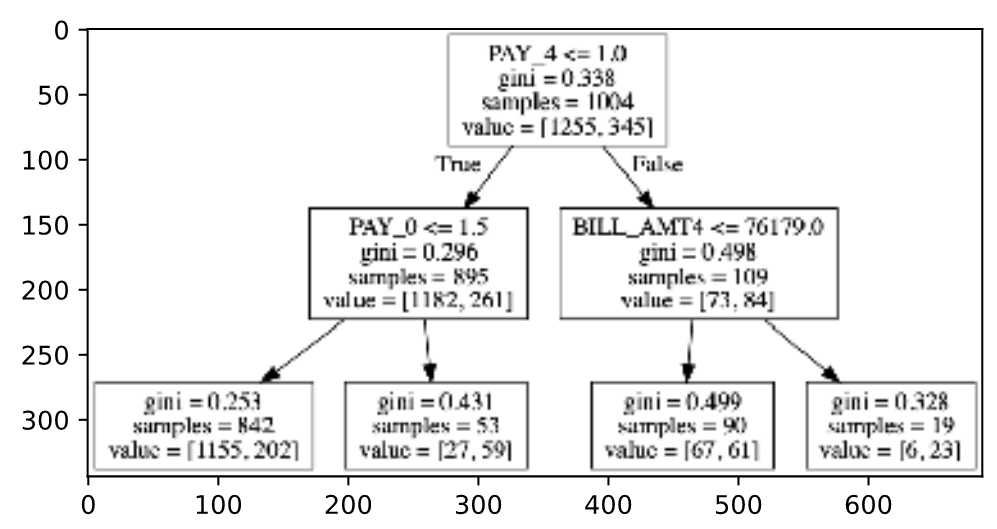

In [10]:
Image('ch1.1.png')

In [14]:
# Exploring Random Forest Hyperparameters
# 
# Understanding what hyperparameters are available and the impact of different hyperparameters 
# is a core skill for any data scientist. As models become more complex, 
# there are many different settings you can set, but only some will have a large impact on your model.
# 
# You will now assess an existing random forest model (it has some bad choices for hyperparameters!) 
# and then make better choices for a new random forest model and assess its performance.
# 
# You will have available:
# 
# X_train, X_test, y_train, y_test DataFrames
# An existing pre-trained random forest estimator, rf_clf_old
# The predictions of the existing random forest estimator on the test set, rf_old_predictions
# Instructions 1/3
# 
# Print out the hyperparameters of the existing random forest classifier by printing 
# the estimator and then create a confusion matrix and accuracy score from it. 
# The test set y_test and the old predictions rf_old_predictions will be quite useful!

In [15]:
# rf_clf_old =
# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=None, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
#             oob_score=False, random_state=42, verbose=0, warm_start=False)

In [16]:
# # Print out the old estimator, notice which hyperparameter is badly set
# print(rf_clf_old)
# 
# # Get confusion matrix & accuracy for the old rf_model
# print("Confusion Matrix: \n\n {} \n Accuracy Score: \n\n {}".format(
#   	confusion_matrix(y_test, rf_old_predictions),  
#   	accuracy_score(y_test, rf_old_predictions)))

In [18]:
# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#                 max_depth=None, max_features='auto', max_leaf_nodes=None,
#                 min_impurity_decrease=0.0, min_impurity_split=None,
#                 min_samples_leaf=1, min_samples_split=2,
#                 min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
#                 oob_score=False, random_state=42, verbose=0, warm_start=False)
#     Confusion Matrix: 
#     
#      [[276  37]
#      [ 64  23]] 
#      Accuracy Score: 
#     
#      0.7475

In [17]:
# Create a new random forest classifier with a better n_estimators (try 500) 
# then fit this to the data and obtain predictions.

In [19]:
# # Print out the old estimator, notice which hyperparameter is badly set
# print(rf_clf_old)
# 
# # Get confusion matrix & accuracy for the old rf_model
# print("Confusion Matrix: \n\n {} \n Accuracy Score: \n\n {}".format(
#   confusion_matrix(y_test, rf_old_predictions),
#   accuracy_score(y_test, rf_old_predictions))) 
# 
# # Create a new random forest classifier with better hyperparamaters
# rf_clf_new = RandomForestClassifier(n_estimators=500)
# 
# # Fit this to the data and obtain predictions
# rf_new_predictions = rf_clf_new.fit(X_train, y_train).predict(X_test)

In [20]:
# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#                 max_depth=None, max_features='auto', max_leaf_nodes=None,
#                 min_impurity_decrease=0.0, min_impurity_split=None,
#                 min_samples_leaf=1, min_samples_split=2,
#                 min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
#                 oob_score=False, random_state=42, verbose=0, warm_start=False)
#     Confusion Matrix: 
#     
#      [[276  37]
#      [ 64  23]] 
#      Accuracy Score: 
#     
#      0.7475

In [21]:
# Assess the performance of the new random forest classifier. 
# Create the confusion matrix and accuracy score and print them out. 
# How does this compare to the first model you were given?

In [22]:
# # Print out the old estimator, notice which hyperparameter is badly set
# print(rf_clf_old)
# 
# # Get confusion matrix & accuracy for the old rf_model
# print("Confusion Matrix: \n\n {} \n Accuracy Score: \n\n {}".format(
#   confusion_matrix(y_test, rf_old_predictions),
#   accuracy_score(y_test, rf_old_predictions))) 
# 
# # Create a new random forest classifier with better hyperparamaters
# rf_clf_new = RandomForestClassifier(n_estimators=500)
# 
# # Fit this to the data and obtain predictions
# rf_new_predictions = rf_clf_new.fit(X_train, y_train).predict(X_test)
# 
# # Assess the new model (using new predictions!)
# print("Confusion Matrix: \n\n", confusion_matrix(y_test, rf_new_predictions))
# print("Accuracy Score: \n\n", accuracy_score(y_test, rf_new_predictions))

In [23]:
# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#                 max_depth=None, max_features='auto', max_leaf_nodes=None,
#                 min_impurity_decrease=0.0, min_impurity_split=None,
#                 min_samples_leaf=1, min_samples_split=2,
#                 min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
#                 oob_score=False, random_state=42, verbose=0, warm_start=False)
#     Confusion Matrix: 
#     
#      [[276  37]
#      [ 64  23]] 
#      Accuracy Score: 
#     
#      0.7475
#     Confusion Matrix: 
#     
#      [[300  13]
#      [ 63  24]]
#     Accuracy Score: 
#     
#      0.81

In [24]:
# Hyperparameters of KNN
# 
# To apply the concepts learned in the prior exercise, 
# it is good practice to try out learnings on a new algorithm. 
# The k-nearest-neighbors algorithm is not as popular as it used to be but can still be 
# an excellent choice for data that has groups of data that behave similarly. 
# Could this be the case for our credit card users?
# 
# In this case you will try out several different values for one of the core hyperparameters 
# for the knn algorithm and compare performance.
# 
# You will have available:
# 
# X_train, X_test, y_train, y_test DataFrames
# Instructions
# 
# Build a knn estimator for the following values of n_neighbors [5,10,20].
# Fit each to the training data and produce predictions.
# Get an accuracy score for each model and print them out.

In [25]:
# # Build a knn estimator for each value of n_neighbours
# knn_5 = KNeighborsClassifier(n_neighbors=5)
# knn_10 = KNeighborsClassifier(n_neighbors=10)
# knn_20 = KNeighborsClassifier(n_neighbors=20)
# 
# # Fit each to the training data & produce predictions
# knn_5_predictions = knn_5.fit(X_train, y_train).predict(X_test)
# knn_10_predictions = knn_10.fit(X_train, y_train).predict(X_test)
# knn_20_predictions = knn_20.fit(X_train, y_train).predict(X_test)
# 
# # Get an accuracy score for each of the models
# knn_5_accuracy = accuracy_score(y_test, knn_5_predictions)
# knn_10_accuracy = accuracy_score(y_test, knn_10_predictions)
# knn_20_accuracy = accuracy_score(y_test, knn_20_predictions)
# print("The accuracy of 5, 10, 20 neighbours was {}, {}, {}".format(knn_5_accuracy, knn_10_accuracy, knn_20_accuracy))

In [26]:
# # Build a knn estimator for each value of n_neighbours
#         knn_5 = KNeighborsClassifier(n_neighbors=5)
#         knn_10 = KNeighborsClassifier(n_neighbors=10)
#         knn_20 = KNeighborsClassifier(n_neighbors=20)
#         
#         # Fit each to the training data & produce predictions
#         knn_5_predictions = knn_5.fit(X_train, y_train).predict(X_test)
#         knn_10_predictions = knn_10.fit(X_train, y_train).predict(X_test)
#         knn_20_predictions = knn_20.fit(X_train, y_train).predict(X_test)
#         
#         # Get an accuracy score for each of the models
#         knn_5_accuracy = accuracy_score(y_test, knn_5_predictions)
#         knn_10_accuracy = accuracy_score(y_test, knn_10_predictions)
#         knn_20_accuracy = accuracy_score(y_test, knn_20_predictions)
#         print("The accuracy of 5, 10, 20 neighbours was {}, {}, {}".format(knn_5_accuracy, knn_10_accuracy, knn_20_accuracy))
# The accuracy of 5, 10, 20 neighbours was 0.7125, 0.765, 0.7825

In [27]:
# Automating Hyperparameter Choice
# 
# Finding the best hyperparameter of interest without writing hundreds of lines of code 
# for hundreds of models is an important efficiency gain that will greatly assist 
# your future machine learning model building.
# 
# An important hyperparameter for the GBM algorithm is the learning rate. 
# But which learning rate is best for this problem? By writing a loop to search through a number of possibilities, 
# collating these and viewing them you can find the best one.
# 
# Possible learning rates to try include 0.001, 0.01, 0.05, 0.1, 0.2 and 0.5
# 
# You will have available X_train, X_test, y_train & y_test datasets, and GradientBoostingClassifier has been imported for you.
# 
# Instructions
# 
# Create a learning_rates list for the learning rates, and a results_list to hold the accuracy score of your predictions.
# Write a loop to create a GBM model for each learning rate mentioned and create predictions for each model.
# Save the learning rate and accuracy score to a results_list.
# Turn the results list into a DataFrame and print it out.

In [28]:
# # Set the learning rates & results storage
# learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
# results_list = []
# 
# # Create the for loop to evaluate model predictions for each learning rate
# for learning_rate in learning_rates:
#     model = GradientBoostingClassifier(learning_rate=learning_rate)
#     predictions = model.fit(X_train, y_train).predict(X_test)
#     # Save the learning rate and accuracy score
#     results_list.append([learning_rate, accuracy_score(y_test, predictions)])
# 
# # Gather everything into a DataFrame
# results_df = pd.DataFrame(results_list, columns=['learning_rate', 'accuracy'])
# print(results_df)

In [29]:
# learning_rate  accuracy
# 0          0.001    0.7825
# 1          0.010    0.8025
# 2          0.050    0.8100
# 3          0.100    0.7975
# 4          0.200    0.7900
# 5          0.500    0.7775

In [30]:
# Building Learning Curves
# 
# If we want to test many different values for a single hyperparameter 
# it can be difficult to easily view that in the form of a DataFrame. 
# Previously you learned about a nice trick to analyze this. 
# A graph called a 'learning curve' can nicely demonstrate the effect 
# of increasing or decreasing a particular hyperparameter on the final result.
# 
# Instead of testing only a few values for the learning rate, 
# you will test many to easily see the effect of this hyperparameter across a large range of values. 
# A useful function from NumPy is np.linspace(start, end, num) 
# which allows you to create a number of values (num) evenly spread within an interval (start, end) that you specify.
# 
# You will have available X_train, X_test, y_train & y_test datasets.
# 
# Instructions
# 
# Create a list of 30 learning rates evenly spread between 0.01 and 2.
# Create a similar loop to last exercise but just save out accuracy scores to a list.
# Plot the learning rates against the accuracy score.

In [31]:
# # Set the learning rates & accuracies list
# learn_rates = np.linspace(0.01, 2, num=30)
# accuracies = []
# 
# # Create the for loop
# for learn_rate in learn_rates:
#   	# Create the model, predictions & save the accuracies as before
#     model = GradientBoostingClassifier(learning_rate=learn_rate)
#     predictions = model.fit(X_train, y_train).predict(X_test)
#     accuracies.append(accuracy_score(y_test, predictions))
# 
# # Plot results    
# plt.plot(learn_rates, accuracies)
# plt.gca().set(xlabel='learning_rate', ylabel='Accuracy', title='Accuracy for different learning_rates')
# plt.show() 

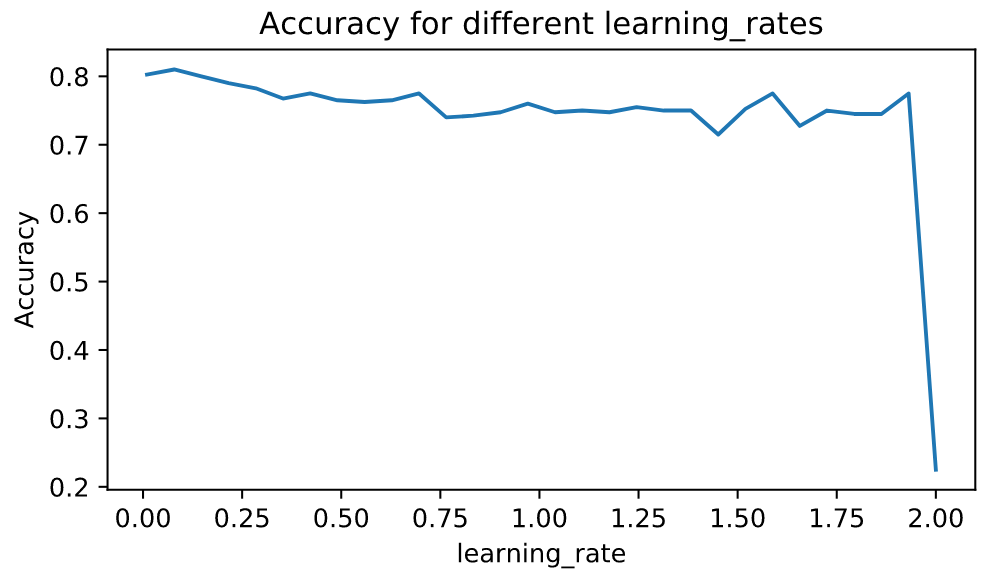

In [32]:
Image('ch1.2.png')

# 2. Grid search

This chapter introduces you to a popular automated hyperparameter tuning methodology called Grid Search. You will learn what it is, how it works and practice undertaking a Grid Search using Scikit Learn. You will then learn how to analyze the output of a Grid Search & gain practical experience doing this.

In [33]:
# Build Grid Search functions
# In data science it is a great idea to try building algorithms, 
# models and processes 'from scratch' so you can really understand what is happening at a deeper level. 
# Of course there are great packages and libraries for this work (and we will get to that very soon!) 
# but building from scratch will give you a great edge in your data science work.
# 
# In this exercise, you will create a function to take in 2 hyperparameters, 
# build models and return results. You will use this function in a future exercise.
# 
# You will have available the X_train, X_test, y_train and y_test datasets available.
# 
# Instructions
# 
# Build a function that takes two parameters called learn_rate and max_depth for the learning rate and maximum depth.
# Add capability in the function to build a GBM model and fit it to the data with the input hyperparameters.
# Have the function return the results of that model and the chosen hyperparameters (learn_rate and max_depth).

In [34]:
# # Create the function
# def gbm_grid_search(learn_rate, max_depth):
# 
# 	# Create the model
#     model = GradientBoostingClassifier(learning_rate=learn_rate, max_depth=max_depth)
#     
#     # Use the model to make predictions
#     predictions = model.fit(X_train, y_train).predict(X_test)
#     
#     # Return the hyperparameters and score
#     return([learn_rate, max_depth, accuracy_score(y_test, predictions)])

In [35]:
# Iteratively tune multiple hyperparameters
# 
# In this exercise, you will build on the function you previously created to take in 2 hyperparameters, 
# build a model and return the results. You will now use that to loop through some values 
# and then extend this function and loop with another hyperparameter.
# 
# The function gbm_grid_search(learn_rate, max_depth) is available in this exercise.
# 
# If you need to remind yourself of the function you can run the function print_func() that has been created for you
# 
# Instructions 1/3
# 
# Write a for-loop to test the values (0.01, 0.1, 0.5) for the learning_rate and (2, 4, 6) 
# for the max_depth using the function you created gbm_grid_search and print the results.

In [36]:
# # Create the relevant lists
# results_list = []
# learn_rate_list = [0.01, 0.1, 0.5]
# max_depth_list = [2,4,6]
# 
# # Create the for loop
# for learn_rate in learn_rate_list:
#     for max_depth in max_depth_list:
#         results_list.append(gbm_grid_search(learn_rate,max_depth))
# 
# # Print the results
# print(results_list)   

[[0.01, 2, 0.78], [0.01, 4, 0.78], [0.01, 6, 0.76], [0.1, 2, 0.74], [0.1, 4, 0.76], [0.1, 6, 0.75], [0.5, 2, 0.73], [0.5, 4, 0.74], [0.5, 6, 0.74]]

In [38]:
# 2. Extend the gbm_grid_search function to include the hyperparameter subsample. 
# Name this new function gbm_grid_search_extended.

In [39]:
# results_list = []
# learn_rate_list = [0.01, 0.1, 0.5]
# max_depth_list = [2,4,6]
# 
# # Extend the function input
# def gbm_grid_search_extended(learn_rate, max_depth, ____):
# 
# 	# Extend the model creation section
#     model = GradientBoostingClassifier(learning_rate=learn_rate, max_depth=max_depth, subsample=____)
#     
#     predictions = model.fit(X_train, y_train).predict(X_test)
#     
#     # Extend the return part
#     return([learn_rate, max_depth, ____, accuracy_score(y_test, predictions)])       

In [41]:
# 3. Extend the gbm_grid_search function to include the hyperparameter subsample. 
# Name this new function gbm_grid_search_extended.

In [42]:
# results_list = []
# 
# # Create the new list to test
# subsample_list = [0.4, 0.6]
# 
# for learn_rate in learn_rate_list:
#     for max_depth in max_depth_list:
#     	
#         # Extend the for loop
#         for subsample in subsample_list:
#         	
#             # Extend the results to include the new hyperparameter
#             results_list.append(gbm_grid_search_extended(learn_rate, max_depth, subsample))
# 
# # Print results
# print(results_list)            

[[0.01, 2, 0.4, 0.73], [0.01, 2, 0.6, 0.74], [0.01, 4, 0.4, 0.73], [0.01, 4, 0.6, 0.75], [0.01, 6, 0.4, 0.72], [0.01, 6, 0.6, 0.78], [0.1, 2, 0.4, 0.74], [0.1, 2, 0.6, 0.74], [0.1, 4, 0.4, 0.73], [0.1, 4, 0.6, 0.73], [0.1, 6, 0.4, 0.74], [0.1, 6, 0.6, 0.76], [0.5, 2, 0.4, 0.64], [0.5, 2, 0.6, 0.67], [0.5, 4, 0.4, 0.72], [0.5, 4, 0.6, 0.71], [0.5, 6, 0.4, 0.63], [0.5, 6, 0.6, 0.64]]

In [44]:
# GridSearchCV with Scikit Learn
# 
# The GridSearchCV module from Scikit Learn provides many useful features to assist with 
# efficiently undertaking a grid search. You will now put your learning into practice by creating 
# a GridSearchCV object with certain parameters.
# 
# The desired options are:
# 
# A Random Forest Estimator, with the split criterion as 'entropy'
# 5-fold cross validation
# The hyperparameters max_depth (2, 4, 8, 15) and max_features ('auto' vs 'sqrt')
# Use roc_auc to score the models
# Use 4 cores for processing in parallel
# Ensure you refit the best model and return training scores
# You will have available X_train, X_test, y_train & y_test datasets.
# 
# Instructions
# 
# Create a Random Forest estimator as specified in the context above.
# Create a parameter grid as specified in the context above.
# Create a GridSearchCV object as outlined in the context above, 
# using the two elements created in the previous two instructions.

In [45]:
# # Create a Random Forest Classifier with specified criterion
# rf_class = RandomForestClassifier(criterion='entropy')
# 
# # Create the parameter grid
# param_grid = {'max_depth': [2, 4, 8, 15], 'max_features': ['auto', 'sqrt']}
# 
# # Create a GridSearchCV object
# grid_rf_class=GridSearchCV(
#     estimator=rf_class,
#     param_grid=param_grid,
#     scoring='roc_auc',
#     n_jobs=4,
#     cv=5,
#     refit=True, return_train_score=True)
# print(grid_rf_class)

In [46]:
# GridSearchCV(cv=5, error_score='raise-deprecating',
#        estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
#             max_depth=None, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
#             oob_score=False, random_state=None, verbose=0,
#             warm_start=False),
#        fit_params=None, iid='warn', n_jobs=4,
#        param_grid={'max_depth': [2, 4, 8, 15], 'max_features': ['auto', 'sqrt']},
#        pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
#        scoring='roc_auc', verbose=0)

In [47]:
# Exploring the grid search results
# 
# You will now explore the cv_results_ property of the GridSearchCV object defined in the video. 
# This is a dictionary that we can read into a pandas DataFrame and contains a lot of 
# useful information about the grid search we just undertook.
# 
# A reminder of the different column types in this property:
# 
# time_ columns
# param_ columns (one for each hyperparameter) and the singular params column (with all hyperparameter settings)
# a train_score column for each cv fold including the mean_train_score and std_train_score columns
# a test_score column for each cv fold including the mean_test_score and std_test_score columns
# a rank_test_score column with a number from 1 to n (number of iterations) 
# ranking the rows based on their mean_test_score
# 
# Instructions
# 
# Read the cv_results_ property of the grid_rf_class GridSearchCV object into 
# a data frame & print the whole thing out to inspect.
# Extract & print the singular column containing a dictionary of all hyperparameters 
# used in each iteration of the grid search.
# Extract & print the row that had the best mean test score by indexing using the rank_test_score column.

In [48]:
# # Read the cv_results property into a dataframe & print it out
# cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
# print(cv_results_df)
# 
# # Extract and print the column with a dictionary of hyperparameters used
# column = cv_results_df.loc[:, ["params"]]
# print(column)
# 
# # Extract and print the row that had the best mean test score
# best_row = cv_results_df[cv_results_df["rank_test_score"] == 1]
# print(best_row)

In [49]:
# mean_fit_time       ...         std_train_score
# 0        0.324582       ...            1.248173e-03
# 1        0.671539       ...            1.319340e-03
# 2        0.977654       ...            1.311001e-03
# 3        0.313844       ...            3.382634e-03
# 4        0.645001       ...            2.134008e-03
# 5        0.967691       ...            2.131063e-03
# 6        0.342355       ...            4.965068e-17
# 7        0.724901       ...            4.965068e-17
# 8        1.078176       ...            0.000000e+00
# 9        0.351497       ...            7.821910e-04
# 10       0.695131       ...            3.932301e-04
# 11       0.792999       ...            7.443455e-04
# 
# [12 rows x 23 columns]
#                                                params
# 0   {'max_depth': 10, 'min_samples_leaf': 1, 'n_es...
# 1   {'max_depth': 10, 'min_samples_leaf': 1, 'n_es...
# 2   {'max_depth': 10, 'min_samples_leaf': 1, 'n_es...
# 3   {'max_depth': 10, 'min_samples_leaf': 2, 'n_es...
# 4   {'max_depth': 10, 'min_samples_leaf': 2, 'n_es...
# 5   {'max_depth': 10, 'min_samples_leaf': 2, 'n_es...
# 6   {'max_depth': 20, 'min_samples_leaf': 1, 'n_es...
# 7   {'max_depth': 20, 'min_samples_leaf': 1, 'n_es...
# 8   {'max_depth': 20, 'min_samples_leaf': 1, 'n_es...
# 9   {'max_depth': 20, 'min_samples_leaf': 2, 'n_es...
# 10  {'max_depth': 20, 'min_samples_leaf': 2, 'n_es...
# 11  {'max_depth': 20, 'min_samples_leaf': 2, 'n_es...
#    mean_fit_time       ...         std_train_score
# 2       0.977654       ...                0.001311
# 
# [1 rows x 23 columns]

In [50]:
# Analyzing the best results
# 
# At the end of the day, we primarily care about the best performing 'square' in a grid search. 
# Luckily Scikit Learn's gridSearchCv objects have a number of parameters that provide key information 
# on just the best square (or row in cv_results_).
# 
# Three properties you will explore are:
# 
# best_score_ – The score (here ROC_AUC) from the best-performing square.
# best_index_ – The index of the row in cv_results_ containing information on the best-performing square.
# best_params_ – A dictionary of the parameters that gave the best score, for example 'max_depth': 10
# The grid search object grid_rf_class is available.
# 
# A dataframe (cv_results_df) has been created from the cv_results_ for you on line 6. 
# This will help you index into the results.
# 
# Instructions
# 
# Extract and print out the ROC_AUC score from the best performing square in grid_rf_class.
# Create a variable from the best-performing row by indexing into cv_results_df.
# Create a variable, best_n_estimators by extracting the n_estimators parameter from 
# the best-performing square in grid_rf_class and print it out.

In [51]:
# # Print out the ROC_AUC score from the best-performing square
# best_score = grid_rf_class.best_score_
# print(best_score)
# 
# # Create a variable from the row related to the best-performing square
# cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
# best_row = cv_results_df.loc[[grid_rf_class.best_index_]]
# print(best_row)
# 
# # Get the n_estimators parameter from the best-performing square and print
# best_n_estimators = grid_rf_class.best_params_["n_estimators"]
# print(best_n_estimators)

In [52]:
# 0.7718143027468853
#    mean_fit_time       ...         std_train_score
# 2       0.977654       ...                0.001311
# 
# [1 rows x 23 columns]
# 300

In [53]:
# Using the best results
# 
# While it is interesting to analyze the results of our grid search, 
# our final goal is practical in nature; we want to make predictions on our test set using our estimator object.
# 
# We can access this object through the best_estimator_ property of our grid search object.
# 
# In this exercise we will take a look inside the best_estimator_ property and then use 
# this to make predictions on our test set for credit card defaults and generate a variety of scores. 
# Remember to use predict_proba rather than predict since we need probability values rather 
# than class labels for our roc_auc score. We use a slice [:,1] to get probabilities of the positive class.
# 
# You have available the X_test and y_test datasets to use and the grid_rf_class object from previous exercises.
# 
# Instructions
# 
# Check the type of the best_estimator_ property.
# Use the best_estimator_ property to make predictions on our test set.
# Generate a confusion matrix and ROC_AUC score from our predictions.

In [54]:
# # See what type of object the best_estimator_ property is
# print(type(grid_rf_class.best_estimator_))
# 
# # Create an array of predictions directly using the best_estimator_ property
# predictions = grid_rf_class.best_estimator_.predict(X_test)
# 
# # Take a look to confirm it worked, this should be an array of 1's and 0's
# print(predictions[0:5])
# 
# # Now create a confusion matrix 
# print("Confusion Matrix \n", confusion_matrix(y_test, predictions))
# 
# # Get the ROC-AUC score
# predictions_proba = grid_rf_class.best_estimator_.predict_proba(X_test)[:,1]
# print("ROC-AUC Score \n", roc_auc_score(y_test, predictions_proba))

In [55]:
# <class 'sklearn.ensemble.forest.RandomForestClassifier'>
# [0 0 0 0 1]
# Confusion Matrix 
#  [[140   8]
#  [ 36  16]]
# ROC-AUC Score 
#  0.7436330561330562

# 3. Random Search

In this chapter you will be introduced to another popular automated hyperparameter tuning methodology called Random Search. You will learn what it is, how it works and importantly how it differs from grid search. You will learn some advantages and disadvantages of this method and when to choose this method compared to Grid Search. You will practice undertaking a Random Search with Scikit Learn as well as visualizing & interpreting the output.

In [56]:
# Randomly Sample Hyperparameters
# 
# To undertake a random search, we firstly need to undertake a random sampling of our hyperparameter space.
# 
# In this exercise, you will firstly create some lists of hyperparameters that can be zipped up to a list of lists. 
# Then you will randomly sample hyperparameter combinations preparation for running a random search.
# 
# You will use just the hyperparameters learning_rate and min_samples_leaf of the GBM algorithm 
# to keep the example illustrative and not overly complicated.
# 
# Instructions
# 
# Create a list of 200 values for the learning_rate hyperparameter between 0.01 and 1.5 
# and assign to the list learn_rate_list.
# Create a list of values between 10 and 40 inclusive for the hyperparameter min_samples_leaf 
# and assign to the list min_samples_list.
# Combine these lists into a list of lists to sample from.
# Randomly sample 250 models from these hyperparameter combinations and print the result.

In [57]:
# # Create a list of values for the learning_rate hyperparameter
# learn_rate_list = list(np.linspace(0.01,1.5,200))
# 
# # Create a list of values for the min_samples_leaf hyperparameter
# min_samples_list = list(range(10,41))
# 
# # Combination list
# combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]
# 
# # Sample hyperparameter combinations for a random search.
# random_combinations_index = np.random.choice(range(0, len(combinations_list)), 250, replace=False)
# combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]
# 
# # Print the result
# print(combinations_random_chosen)

 [[1.305326633165829, 14], [0.6015075376884422, 24], [0.6089949748743718, 35], [1.3128140703517588, 33], [0.3244723618090452, 23], [0.07738693467336683, 27], [0.2421105527638191, 18], [1.1855276381909547, 24], [0.17472361809045225, 11], [0.7662311557788944, 12], [1.0657286432160804, 39], [0.7287939698492463, 22], [1.2604020100502513, 40], [1.0881909547738693, 12], [1.2079899497487436, 39], [1.4475879396984925, 15], [1.327788944723618, 16], [0.7587437185929649, 37], [0.46673366834170854, 10], [0.2720603015075377, 22], [1.2079899497487436, 12], [1.095678391959799, 27], [0.5790452261306532, 31], [0.18969849246231157, 22], [0.17472361809045225, 40], [1.2604020100502513, 39], [0.33195979899497485, 39], [0.05492462311557789, 32], [0.6314572864321608, 40], [0.9758793969849247, 14], [0.7886934673366834, 40], [1.200502512562814, 15], [0.4592462311557789, 22], [0.8635678391959799, 16], [0.7512562814070352, 37], [0.039949748743718594, 18], [0.6838693467336683, 38], [1.1480904522613065, 29], [0.42180904522613066, 31], [0.9010050251256281, 31], [0.26457286432160804, 29], [0.945929648241206, 12], [0.46673366834170854, 16], [1.1630653266331659, 18], [0.7587437185929649, 13], [0.6464321608040201, 16], [0.7812060301507537, 14], [1.0282914572864321, 35], [0.6838693467336683, 12], [0.19718592964824122, 22], [0.12231155778894472, 10], [1.4850251256281406, 15], [0.6988442211055276, 31], [0.4966834170854271, 40], [0.2945226130653266, 31], [1.222964824120603, 28], [1.0582412060301507, 25], [0.7362814070351759, 30], [1.1930150753768844, 17], [0.945929648241206, 21], [1.095678391959799, 35], [0.414321608040201, 39], [1.1555778894472362, 34], [0.7812060301507537, 24], [1.3352763819095477, 29], [0.9309547738693467, 10], [1.0657286432160804, 20], [1.07321608040201, 39], [1.3128140703517588, 21], [1.222964824120603, 18], [0.09984924623115578, 16], [0.36939698492462314, 35], [1.1555778894472362, 33], [0.17472361809045225, 24], [0.024974874371859294, 28], [1.178040201005025, 24], [0.6314572864321608, 29], [0.8261306532663316, 24], [1.4101507537688442, 30], [0.7737185929648241, 29], [1.3951758793969848, 15], [1.222964824120603, 15], [0.7362814070351759, 17], [1.2379396984924622, 24], [0.38437185929648243, 19], [1.07321608040201, 11], [1.4326130653266331, 31], [0.7437688442211056, 17], [1.2154773869346733, 14], [0.6015075376884422, 12], [0.5565829145728644, 19], [1.4401005025125628, 20], [1.222964824120603, 11], [1.2828643216080402, 20], [1.3352763819095477, 18], [1.200502512562814, 24], [1.29035175879397, 16], [0.9010050251256281, 36], [0.9010050251256281, 26], [1.4176381909547737, 17], [1.4326130653266331, 30], [0.3993467336683417, 13], [0.12979899497487438, 20], [1.0881909547738693, 17], [0.024974874371859294, 27], [0.3244723618090452, 10], [0.48170854271356783, 20], [0.6164824120603015, 22], [0.9384422110552764, 28], [0.9833668341708542, 36], [1.1406030150753768, 22], [1.2604020100502513, 20], [0.15974874371859296, 15], [1.2379396984924622, 29], [1.2154773869346733, 28], [0.34693467336683415, 34], [0.6539195979899497, 28], [0.06241206030150754, 26], [1.4925125628140703, 31], [1.4700502512562814, 19], [0.2720603015075377, 33], [0.40683417085427137, 39], [0.2945226130653266, 15], [0.8336180904522613, 13], [0.7886934673366834, 12], [1.3128140703517588, 28], [1.1630653266331659, 22], [0.9084924623115578, 21], [1.3577386934673366, 20], [0.6314572864321608, 15], [0.2421105527638191, 13], [1.2379396984924622, 10], [1.07321608040201, 13], [1.4401005025125628, 31], [0.3544221105527638, 27], [0.2945226130653266, 18], [0.7362814070351759, 13], [0.04743718592964824, 22], [0.8935175879396985, 16], [1.1181407035175879, 31], [1.200502512562814, 31], [1.3352763819095477, 31], [0.8860301507537688, 40], [0.12231155778894472, 17], [0.12231155778894472, 14], [1.1406030150753768, 20], [0.3993467336683417, 21], [0.6164824120603015, 25], [0.7063316582914573, 17], [0.03246231155778895, 10], [0.01, 33], [1.1181407035175879, 11], [0.7587437185929649, 15], [1.1630653266331659, 12], [0.7587437185929649, 23], [0.691356783919598, 35], [1.095678391959799, 25], [0.2421105527638191, 26], [1.0357788944723618, 23], [0.26457286432160804, 12], [1.2753768844221105, 34], [0.6239698492462311, 27], [0.414321608040201, 35], [1.4775376884422111, 32], [0.09984924623115578, 39], [0.5116582914572865, 36], [0.6015075376884422, 14], [0.36939698492462314, 31], [0.3394472361809045, 39], [1.5, 33], [0.06989949748743718, 25], [0.5116582914572865, 10], [1.0058291457286432, 15], [0.5640703517587939, 15], [0.09984924623115578, 31], [1.4176381909547737, 27], [0.6239698492462311, 40], [1.1630653266331659, 29], [1.2379396984924622, 23], [1.2304522613065327, 18], [1.327788944723618, 13], [0.6539195979899497, 32], [0.3094974874371859, 14], [1.178040201005025, 11], [0.7138190954773869, 28], [1.2978391959798994, 37], [0.09236180904522612, 20], [1.178040201005025, 30], [0.4592462311557789, 38], [1.4925125628140703, 23], [1.3951758793969848, 30], [0.3993467336683417, 14], [1.1555778894472362, 36], [1.0807035175879396, 14], [0.13728643216080402, 27], [0.6015075376884422, 11], [0.414321608040201, 31], [1.2304522613065327, 31], [1.4026633165829145, 37], [1.1555778894472362, 39], [0.287035175879397, 21], [1.1555778894472362, 20], [0.8485929648241206, 29], [0.2570854271356784, 19], [1.5, 39], [0.8111557788944723, 29], [1.07321608040201, 19], [0.6164824120603015, 21], [0.8036683417085427, 14], [0.15226130653266332, 20], [0.1822110552763819, 39], [0.5565829145728644, 38], [0.2121608040201005, 38], [0.09236180904522612, 15], [0.7587437185929649, 19], [1.013316582914573, 11], [1.3876884422110551, 22], [0.11482412060301507, 13], [1.3951758793969848, 22], [0.017487437185929648, 16], [0.06241206030150754, 23], [1.4026633165829145, 34], [1.3352763819095477, 23], [1.1705527638190953, 33], [0.2570854271356784, 26], [0.45175879396984925, 25], [0.5191457286432161, 20], [0.5416080402010051, 37], [0.42180904522613066, 37], [0.6838693467336683, 29], [0.7213065326633166, 10], [0.7437688442211056, 37], [0.04743718592964824, 11], [0.05492462311557789, 22], [0.01, 24], [1.3876884422110551, 34], [1.4925125628140703, 24], [0.36939698492462314, 20], [0.18969849246231157, 30], [1.4850251256281406, 35], [1.2753768844221105, 10], [1.2604020100502513, 28], [0.945929648241206, 39], [0.7287939698492463, 30], [0.8785427135678392, 13], [1.4101507537688442, 25], [0.7662311557788944, 14], [0.5116582914572865, 31], [1.1555778894472362, 27], [0.30201005025125627, 21]]

In [58]:
# Randomly Search with Random Forest
# 
# To solidify your knowledge of random sampling, let's try a similar exercise but using 
# different hyperparameters and a different algorithm.
# 
# As before, create some lists of hyperparameters that can be zipped up to a list of lists. 
# You will use the hyperparameters criterion, max_depth and max_features of the random forest algorithm. 
# Then you will randomly sample hyperparameter combinations in preparation for running a random search.
# 
# You will use a slightly different package for sampling in this task, random.sample().
# 
# Instructions
# 
# Create lists of the values 'gini' and 'entropy' for criterion & "auto", "sqrt", "log2", None for max_features.
# Create a list of values between 3 and 55 inclusive for the hyperparameter max_depth 
# and assign to the list max_depth_list. Remember that range(N,M) will create a list from N to M-1.
# Combine these lists into a list of lists to sample from using product().
# Randomly sample 150 models from the combined list and print the result.

In [59]:
# # Create lists for criterion and max_features
# criterion_list = ["gini", "entropy"]
# max_feature_list = ["auto", "sqrt", "log2", None]
# 
# # Create a list of values for the max_depth hyperparameter
# max_depth_list = list(range(3,56))
# 
# # Combination list
# combinations_list = [list(x) for x in product(criterion_list, max_feature_list, max_depth_list)]
# 
# # Sample hyperparameter combinations for a random search
# combinations_random_chosen = random.sample(combinations_list, 150)
# 
# # Print the result
# print(combinations_random_chosen)

[['gini', 'auto', 23], ['entropy', 'auto', 35], ['entropy', 'auto', 23], ['gini', None, 18], ['entropy', 'auto', 30], ['entropy', 'auto', 10], ['gini', None, 20], ['gini', 'sqrt', 5], ['gini', 'log2', 9], ['entropy', None, 18], ['entropy', 'sqrt', 9], ['gini', 'log2', 55], ['gini', 'sqrt', 35], ['entropy', 'log2', 51], ['gini', 'log2', 42], ['gini', 'auto', 39], ['entropy', 'auto', 29], ['gini', None, 47], ['entropy', None, 47], ['entropy', 'auto', 4], ['entropy', None, 33], ['gini', 'sqrt', 17], ['entropy', 'sqrt', 14], ['gini', 'log2', 45], ['gini', None, 25], ['gini', 'sqrt', 54], ['entropy', 'auto', 40], ['gini', 'log2', 30], ['gini', 'auto', 36], ['gini', 'log2', 26], ['entropy', 'auto', 8], ['entropy', 'sqrt', 23], ['gini', 'auto', 7], ['entropy', 'log2', 12], ['gini', 'log2', 32], ['gini', None, 14], ['entropy', 'log2', 43], ['gini', 'sqrt', 26], ['entropy', 'log2', 36], ['gini', 'sqrt', 38], ['entropy', None, 37], ['entropy', None, 51], ['gini', None, 43], ['gini', 'auto', 13], ['entropy', 'auto', 12], ['gini', 'sqrt', 30], ['gini', 'sqrt', 46], ['entropy', 'auto', 28], ['entropy', 'log2', 25], ['entropy', 'log2', 47], ['entropy', None, 19], ['gini', 'log2', 22], ['gini', 'auto', 19], ['gini', 'log2', 44], ['entropy', 'auto', 21], ['entropy', 'auto', 13], ['entropy', 'auto', 27], ['gini', 'log2', 28], ['entropy', 'log2', 49], ['entropy', None, 4], ['gini', 'sqrt', 44], ['gini', None, 12], ['gini', 'auto', 21], ['entropy', 'auto', 37], ['gini', 'log2', 25], ['entropy', 'log2', 50], ['gini', None, 42], ['gini', 'auto', 40], ['gini', 'log2', 36], ['entropy', 'auto', 51], ['entropy', 'sqrt', 8], ['gini', None, 30], ['gini', 'log2', 31], ['entropy', 'log2', 41], ['gini', 'auto', 24], ['entropy', None, 26], ['entropy', 'log2', 53], ['entropy', None, 7], ['gini', 'auto', 55], ['entropy', 'log2', 38], ['gini', 'auto', 52], ['entropy', 'auto', 33], ['gini', None, 46], ['gini', None, 3], ['entropy', 'sqrt', 33], ['gini', 'sqrt', 21], ['gini', 'sqrt', 43], ['entropy', 'auto', 48], ['gini', 'log2', 54], ['entropy', 'sqrt', 47], ['entropy', 'sqrt', 38], ['gini', None, 21], ['entropy', 'sqrt', 31], ['gini', 'log2', 53], ['entropy', None, 43], ['gini', 'log2', 38], ['gini', None, 38], ['entropy', 'sqrt', 51], ['entropy', 'auto', 7], ['entropy', 'sqrt', 44], ['gini', 'auto', 26], ['gini', 'sqrt', 51], ['gini', 'auto', 37], ['gini', 'log2', 40], ['entropy', 'log2', 29], ['gini', 'log2', 46], ['entropy', 'auto', 9], ['gini', None, 50], ['entropy', None, 34], ['gini', 'auto', 12], ['gini', 'sqrt', 55], ['entropy', 'log2', 3], ['entropy', 'sqrt', 39], ['entropy', 'log2', 44], ['gini', 'sqrt', 31], ['gini', 'log2', 39], ['entropy', 'sqrt', 35], ['entropy', 'auto', 49], ['gini', 'sqrt', 6], ['entropy', 'log2', 20], ['gini', 'auto', 32], ['entropy', None, 48], ['entropy', None, 9], ['gini', 'sqrt', 47], ['entropy', 'sqrt', 11], ['gini', 'log2', 21], ['entropy', 'log2', 22], ['entropy', 'log2', 24], ['entropy', 'log2', 7], ['gini', 'auto', 44], ['gini', 'sqrt', 36], ['gini', None, 35], ['gini', 'sqrt', 34], ['entropy', 'log2', 52], ['gini', 'auto', 14], ['entropy', 'sqrt', 26], ['entropy', 'log2', 48], ['gini', 'sqrt', 32], ['entropy', 'log2', 35], ['entropy', 'log2', 19], ['gini', 'auto', 30], ['entropy', 'log2', 4], ['entropy', 'sqrt', 40], ['entropy', None, 53], ['entropy', 'log2', 21], ['entropy', 'log2', 42], ['entropy', 'auto', 38], ['gini', 'log2', 23], ['gini', None, 11], ['gini', 'log2', 50]]

In [60]:
# Visualizing a Random Search
# 
# Visualizing the search space of random search allows you to easily see 
# the coverage of this technique and therefore allows you to see the effect of your sampling on the search space.
# 
# In this exercise you will use several different samples of hyperparameter 
# combinations and produce visualizations of the search space.
# 
# The function sample_and_visualize_hyperparameters() takes a single argument 
# (number of combinations to sample) and then randomly samples hyperparameter combinations, 
# just like you did in the last exercise! The function will then visualize the combinations.
# 
# If you want to see the function definition, you can use Python's handy inspect library, like so:
# 
# print(inspect.getsource(sample_and_visualize_hyperparameters))
# 
# Instructions
# 
# Confirm how many possible hyperparameter combinations there are in combinations_list 
# by assigning to the variable number_combs and print this out.
# 
# Sample and visualize 50, 500 and 1500 combinations. You will use a loop for succinctness. 
# What do you notice about the visualization?
# 
# Now sample and visualize the entire set of combinations. You have already made a variable to assist with this. 
# What does this look like?

In [61]:
# # Confirm how many hyperparameter combinations & print
# number_combs = len(combinations_list)
# print(number_combs)
# 
# # Sample and visualise specified combinations
# for x in [50, 500, 1500]:
#     sample_and_visualize_hyperparameters(x)
#     
# # Sample all the hyperparameter combinations & visualise
# sample_and_visualize_hyperparameters(number_combs)

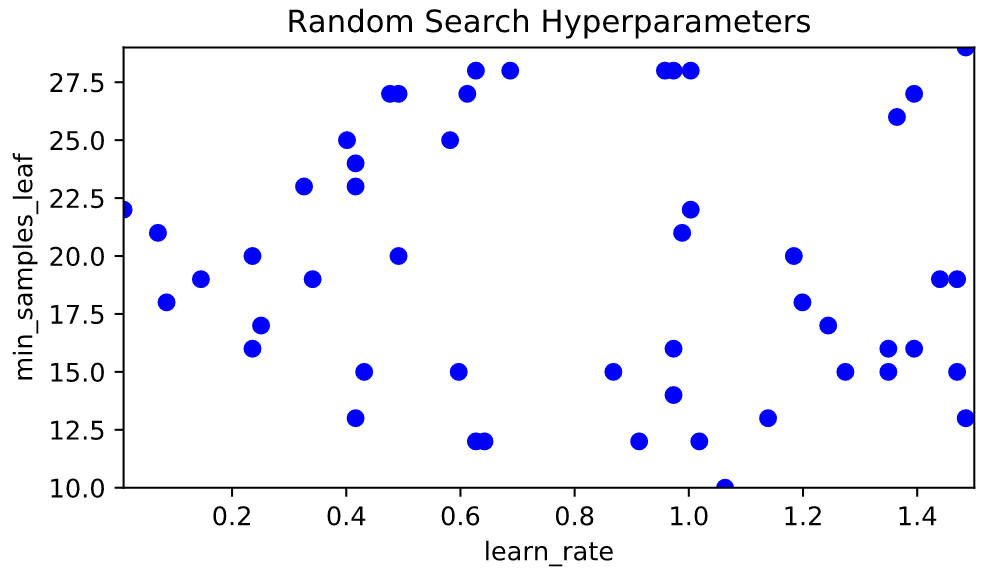

In [62]:
Image('ch3.1.png')

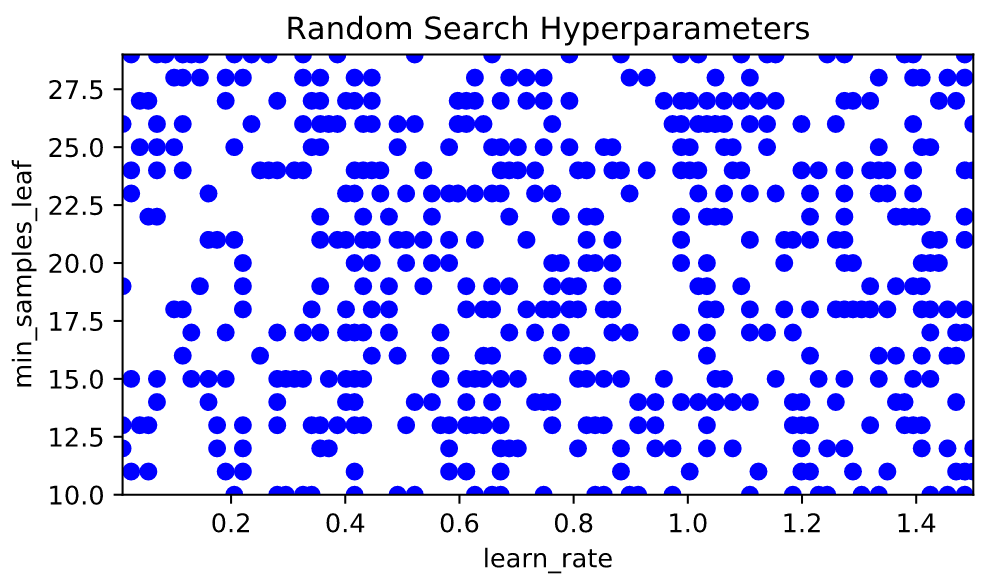

In [63]:
Image('ch3.2.png')

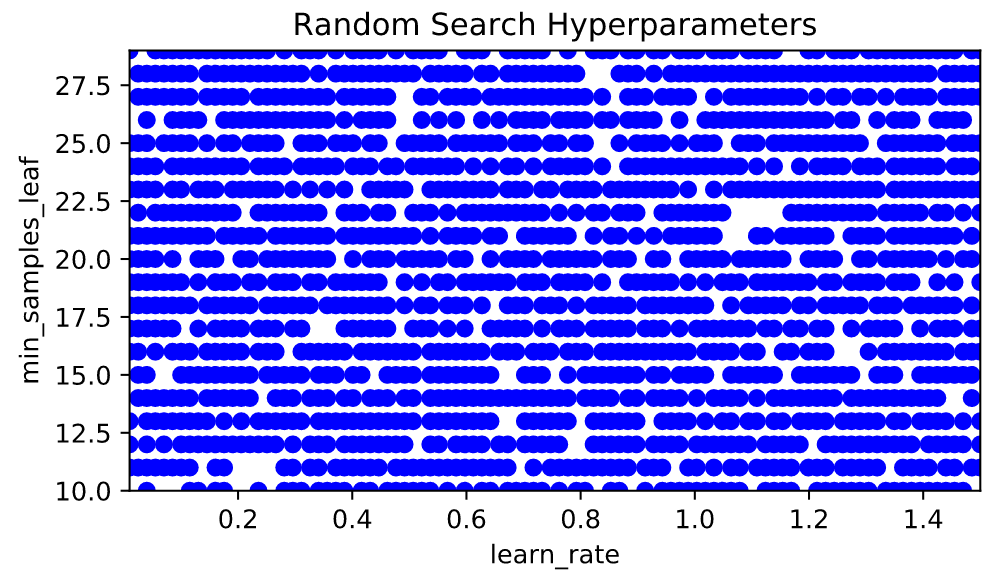

In [64]:
Image('ch3.3.png')

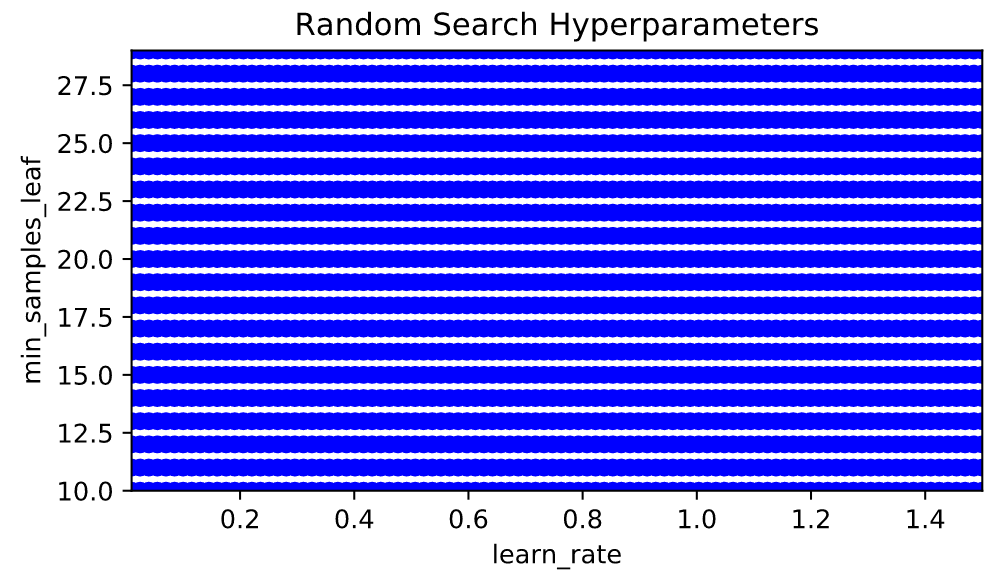

In [65]:
Image('ch3.4.png')

In [66]:
# The RandomizedSearchCV Object
# 
# Just like the GridSearchCV library from Scikit Learn, 
# RandomizedSearchCV provides many useful features to assist with efficiently undertaking a random search. 
# You're going to create a RandomizedSearchCV object, making the small adjustment needed from the GridSearchCV object.
# 
# The desired options are:
# 
# A default Gradient Boosting Classifier Estimator
# 5-fold cross validation
# Use accuracy to score the models
# Use 4 cores for processing in parallel
# Ensure you refit the best model and return training scores
# Randomly sample 10 models
# The hyperparameter grid should be for learning_rate (150 values between 0.1 and 2) 
# and min_samples_leaf (all values between and including 20 and 64).
# 
# You will have available X_train & y_train datasets.
# 
# Instructions
# 
# Create a parameter grid as specified in the context above.
# Create a RandomizedSearchCV object as outlined in the context above.
# Fit the RandomizedSearchCV object to the training data.
# Print the values chosen by the modeling process for both hyperparameters.

In [67]:
# # Create the parameter grid
# param_grid = {'learning_rate': np.linspace(0.1, 2, 150), 'min_samples_leaf': list(range(20, 65))} 
# 
# # Create a random search object
# random_GBM_class = RandomizedSearchCV(
#     estimator = GradientBoostingClassifier(),
#     param_distributions = param_grid,
#     n_iter = 10,
#     scoring='accuracy', n_jobs=4, cv = 5, refit=True, return_train_score = True)
# 
# # Fit to the training data
# random_GBM_class.fit(X_train, y_train)
# 
# # Print the values used for both hyperparameters
# print(random_GBM_class.cv_results_['param_learning_rate'])
# print(random_GBM_class.cv_results_['param_min_samples_leaf'])

In [68]:
# [1.1073825503355705 1.0691275167785235 0.4697986577181208
#  1.2476510067114095 1.5664429530201343 1.7577181208053692
#  1.859731543624161 1.5791946308724834 0.5463087248322147
#  1.7577181208053692]
# [47 54 61 30 63 32 60 43 38 27]

In [69]:
# RandomSearchCV in Scikit Learn
# 
# Let's practice building a RandomizedSearchCV object using Scikit Learn.
# 
# The hyperparameter grid should be for max_depth (all values between and including 5 and 25) 
# and max_features ('auto' and 'sqrt').
# 
# The desired options for the RandomizedSearchCV object are:
# 
# A RandomForestClassifier Estimator with n_estimators of 80.
# 3-fold cross validation (cv)
# Use roc_auc to score the models
# Use 4 cores for processing in parallel (n_jobs)
# Ensure you refit the best model and return training scores
# Only sample 5 models for efficiency (n_iter)
# X_train & y_train datasets are loaded for you.
# 
# Remember, to extract the chosen hyperparameters these are found in cv_results_ with a column per hyperparameter. 
# For example, the column for the hyperparameter criterion would be param_criterion.
# 
# Instructions
# 100 XP
# Create a hyperparameter grid as specified in the context above.
# Create a RandomizedSearchCV object as outlined in the context above.
# Fit the RandomizedSearchCV object to the training data.
# Index into the cv_results_ object to print the values chosen by the modeling process for both 
# hyperparameters (max_depth and max_features).

In [70]:
# # Create the parameter grid
# param_grid = {'max_depth': list(range(5,26)), 'max_features': ['auto' , 'sqrt']} 
# 
# # Create a random search object
# random_rf_class = RandomizedSearchCV(
#     estimator = RandomForestClassifier(n_estimators=80),
#     param_distributions = param_grid, n_iter = 5,
#     scoring='roc_auc', n_jobs=4, cv = 3, refit=True, return_train_score = True)
# 
# # Fit to the training data
# random_rf_class.fit(X_train, y_train)
# 
# # Print the values used for both hyperparameters
# print(random_rf_class.cv_results_['param_max_depth'])
# print(random_rf_class.cv_results_['param_max_features'])

In [71]:
# [18 11 10 22 10]
# ['sqrt' 'auto' 'sqrt' 'sqrt' 'auto']

In [72]:
# Grid and Random Search Side by Side
# 
# Visualizing the search space of random and grid search together allows you to easily 
# see the coverage that each technique has and therefore brings to life their specific advantages and disadvantages.
# 
# In this exercise, you will sample hyperparameter combinations in a grid search way 
# as well as a random search way, then plot these to see the difference.
# 
# You will have available:
# 
# combinations_list which is a list of combinations of learn_rate and min_samples_leaf for this algorithm
# The function visualize_search() which will make your hyperparameter combinations into X and Y coordinates 
# and plot both grid and random search combinations on the same graph. 
# It takes as input two lists of hyperparameter combinations.
# 
# Instructions 1/4
# 
# Sample (by slicing) 300 hyperparameter combinations for a grid search from combinations_list into 
# two lists and print the result.

In [73]:
# # Sample grid coordinates
# grid_combinations_chosen = combinations_list[0:300]
# 
# # Print result
# print(grid_combinations_chosen)

[[0.01, 5], [0.01, 6], [0.01, 7], [0.01, 8], [0.01, 9], [0.01, 10], [0.01, 11], [0.01, 12], [0.01, 13], [0.01, 14], [0.01, 15], [0.01, 16], [0.01, 17], [0.01, 18], [0.01, 19], [0.01, 20], [0.01, 21], [0.01, 22], [0.01, 23], [0.01, 24], [0.025025125628140705, 5], [0.025025125628140705, 6], [0.025025125628140705, 7], [0.025025125628140705, 8], [0.025025125628140705, 9], [0.025025125628140705, 10], [0.025025125628140705, 11], [0.025025125628140705, 12], [0.025025125628140705, 13], [0.025025125628140705, 14], [0.025025125628140705, 15], [0.025025125628140705, 16], [0.025025125628140705, 17], [0.025025125628140705, 18], [0.025025125628140705, 19], [0.025025125628140705, 20], [0.025025125628140705, 21], [0.025025125628140705, 22], [0.025025125628140705, 23], [0.025025125628140705, 24], [0.04005025125628141, 5], [0.04005025125628141, 6], [0.04005025125628141, 7], [0.04005025125628141, 8], [0.04005025125628141, 9], [0.04005025125628141, 10], [0.04005025125628141, 11], [0.04005025125628141, 12], [0.04005025125628141, 13], [0.04005025125628141, 14], [0.04005025125628141, 15], [0.04005025125628141, 16], [0.04005025125628141, 17], [0.04005025125628141, 18], [0.04005025125628141, 19], [0.04005025125628141, 20], [0.04005025125628141, 21], [0.04005025125628141, 22], [0.04005025125628141, 23], [0.04005025125628141, 24], [0.055075376884422114, 5], [0.055075376884422114, 6], [0.055075376884422114, 7], [0.055075376884422114, 8], [0.055075376884422114, 9], [0.055075376884422114, 10], [0.055075376884422114, 11], [0.055075376884422114, 12], [0.055075376884422114, 13], [0.055075376884422114, 14], [0.055075376884422114, 15], [0.055075376884422114, 16], [0.055075376884422114, 17], [0.055075376884422114, 18], [0.055075376884422114, 19], [0.055075376884422114, 20], [0.055075376884422114, 21], [0.055075376884422114, 22], [0.055075376884422114, 23], [0.055075376884422114, 24], [0.07010050251256282, 5], [0.07010050251256282, 6], [0.07010050251256282, 7], [0.07010050251256282, 8], [0.07010050251256282, 9], [0.07010050251256282, 10], [0.07010050251256282, 11], [0.07010050251256282, 12], [0.07010050251256282, 13], [0.07010050251256282, 14], [0.07010050251256282, 15], [0.07010050251256282, 16], [0.07010050251256282, 17], [0.07010050251256282, 18], [0.07010050251256282, 19], [0.07010050251256282, 20], [0.07010050251256282, 21], [0.07010050251256282, 22], [0.07010050251256282, 23], [0.07010050251256282, 24], [0.08512562814070351, 5], [0.08512562814070351, 6], [0.08512562814070351, 7], [0.08512562814070351, 8], [0.08512562814070351, 9], [0.08512562814070351, 10], [0.08512562814070351, 11], [0.08512562814070351, 12], [0.08512562814070351, 13], [0.08512562814070351, 14], [0.08512562814070351, 15], [0.08512562814070351, 16], [0.08512562814070351, 17], [0.08512562814070351, 18], [0.08512562814070351, 19], [0.08512562814070351, 20], [0.08512562814070351, 21], [0.08512562814070351, 22], [0.08512562814070351, 23], [0.08512562814070351, 24], [0.10015075376884422, 5], [0.10015075376884422, 6], [0.10015075376884422, 7], [0.10015075376884422, 8], [0.10015075376884422, 9], [0.10015075376884422, 10], [0.10015075376884422, 11], [0.10015075376884422, 12], [0.10015075376884422, 13], [0.10015075376884422, 14], [0.10015075376884422, 15], [0.10015075376884422, 16], [0.10015075376884422, 17], [0.10015075376884422, 18], [0.10015075376884422, 19], [0.10015075376884422, 20], [0.10015075376884422, 21], [0.10015075376884422, 22], [0.10015075376884422, 23], [0.10015075376884422, 24], [0.11517587939698493, 5], [0.11517587939698493, 6], [0.11517587939698493, 7], [0.11517587939698493, 8], [0.11517587939698493, 9], [0.11517587939698493, 10], [0.11517587939698493, 11], [0.11517587939698493, 12], [0.11517587939698493, 13], [0.11517587939698493, 14], [0.11517587939698493, 15], [0.11517587939698493, 16], [0.11517587939698493, 17], [0.11517587939698493, 18], [0.11517587939698493, 19], [0.11517587939698493, 20], [0.11517587939698493, 21], [0.11517587939698493, 22], [0.11517587939698493, 23], [0.11517587939698493, 24], [0.13020100502512563, 5], [0.13020100502512563, 6], [0.13020100502512563, 7], [0.13020100502512563, 8], [0.13020100502512563, 9], [0.13020100502512563, 10], [0.13020100502512563, 11], [0.13020100502512563, 12], [0.13020100502512563, 13], [0.13020100502512563, 14], [0.13020100502512563, 15], [0.13020100502512563, 16], [0.13020100502512563, 17], [0.13020100502512563, 18], [0.13020100502512563, 19], [0.13020100502512563, 20], [0.13020100502512563, 21], [0.13020100502512563, 22], [0.13020100502512563, 23], [0.13020100502512563, 24], [0.14522613065326634, 5], [0.14522613065326634, 6], [0.14522613065326634, 7], [0.14522613065326634, 8], [0.14522613065326634, 9], [0.14522613065326634, 10], [0.14522613065326634, 11], [0.14522613065326634, 12], [0.14522613065326634, 13], [0.14522613065326634, 14], [0.14522613065326634, 15], [0.14522613065326634, 16], [0.14522613065326634, 17], [0.14522613065326634, 18], [0.14522613065326634, 19], [0.14522613065326634, 20], [0.14522613065326634, 21], [0.14522613065326634, 22], [0.14522613065326634, 23], [0.14522613065326634, 24], [0.16025125628140705, 5], [0.16025125628140705, 6], [0.16025125628140705, 7], [0.16025125628140705, 8], [0.16025125628140705, 9], [0.16025125628140705, 10], [0.16025125628140705, 11], [0.16025125628140705, 12], [0.16025125628140705, 13], [0.16025125628140705, 14], [0.16025125628140705, 15], [0.16025125628140705, 16], [0.16025125628140705, 17], [0.16025125628140705, 18], [0.16025125628140705, 19], [0.16025125628140705, 20], [0.16025125628140705, 21], [0.16025125628140705, 22], [0.16025125628140705, 23], [0.16025125628140705, 24], [0.17527638190954775, 5], [0.17527638190954775, 6], [0.17527638190954775, 7], [0.17527638190954775, 8], [0.17527638190954775, 9], [0.17527638190954775, 10], [0.17527638190954775, 11], [0.17527638190954775, 12], [0.17527638190954775, 13], [0.17527638190954775, 14], [0.17527638190954775, 15], [0.17527638190954775, 16], [0.17527638190954775, 17], [0.17527638190954775, 18], [0.17527638190954775, 19], [0.17527638190954775, 20], [0.17527638190954775, 21], [0.17527638190954775, 22], [0.17527638190954775, 23], [0.17527638190954775, 24], [0.19030150753768846, 5], [0.19030150753768846, 6], [0.19030150753768846, 7], [0.19030150753768846, 8], [0.19030150753768846, 9], [0.19030150753768846, 10], [0.19030150753768846, 11], [0.19030150753768846, 12], [0.19030150753768846, 13], [0.19030150753768846, 14], [0.19030150753768846, 15], [0.19030150753768846, 16], [0.19030150753768846, 17], [0.19030150753768846, 18], [0.19030150753768846, 19], [0.19030150753768846, 20], [0.19030150753768846, 21], [0.19030150753768846, 22], [0.19030150753768846, 23], [0.19030150753768846, 24], [0.20532663316582916, 5], [0.20532663316582916, 6], [0.20532663316582916, 7], [0.20532663316582916, 8], [0.20532663316582916, 9], [0.20532663316582916, 10], [0.20532663316582916, 11], [0.20532663316582916, 12], [0.20532663316582916, 13], [0.20532663316582916, 14], [0.20532663316582916, 15], [0.20532663316582916, 16], [0.20532663316582916, 17], [0.20532663316582916, 18], [0.20532663316582916, 19], [0.20532663316582916, 20], [0.20532663316582916, 21], [0.20532663316582916, 22], [0.20532663316582916, 23], [0.20532663316582916, 24], [0.22035175879396987, 5], [0.22035175879396987, 6], [0.22035175879396987, 7], [0.22035175879396987, 8], [0.22035175879396987, 9], [0.22035175879396987, 10], [0.22035175879396987, 11], [0.22035175879396987, 12], [0.22035175879396987, 13], [0.22035175879396987, 14], [0.22035175879396987, 15], [0.22035175879396987, 16], [0.22035175879396987, 17], [0.22035175879396987, 18], [0.22035175879396987, 19], [0.22035175879396987, 20], [0.22035175879396987, 21], [0.22035175879396987, 22], [0.22035175879396987, 23], [0.22035175879396987, 24]]

In [75]:
# 2. Let's randomly sample too. Create a list of every index in combinations_list to sample from using range()
# Use np.random.choice() to sample 300 combinations. The first two arguments are a list to sample 
# from and the number of samples.

In [76]:
# # Sample grid coordinates
# grid_combinations_chosen = combinations_list[0:300]
# 
# # Create a list of sample indexes
# sample_indexes = list(range(0,len(combinations_list)))
# 
# # Randomly sample 300 indexes
# random_indexes = np.random.choice(sample_indexes, 300, replace=False)

In [77]:
# 3. Now use the list of random indexes to index into combinations_list using a list comprehension.

In [78]:
# # Sample grid coordinates
# grid_combinations_chosen = combinations_list[0:300]
# 
# # Create a list of sample indexes
# sample_indexes = list(range(0,len(combinations_list)))
# 
# # Randomly sample 300 indexes
# random_indexes = np.random.choice(sample_indexes, 300, replace=False)
# 
# # Use indexes to create random sample
# random_combinations_chosen = [combinations_list[index] for index in random_indexes]

In [79]:
# 4. Use the provided visualize_search() function to visualize the two sampling methodologies. 
# The first argument is your grid combinations, the second argument is the random combinations you created.

In [80]:
# # Sample grid coordinates
# grid_combinations_chosen = combinations_list[0:300]
# 
# # Create a list of sample indexes
# sample_indexes = list(range(0,len(combinations_list)))
# 
# # Randomly sample 300 indexes
# random_indexes = np.random.choice(sample_indexes, 300, replace=False)
# 
# # Use indexes to create random sample
# random_combinations_chosen = [combinations_list[index] for index in random_indexes]
# 
# # Call the function to produce the visualization
# visualize_search(grid_combinations_chosen, random_combinations_chosen)

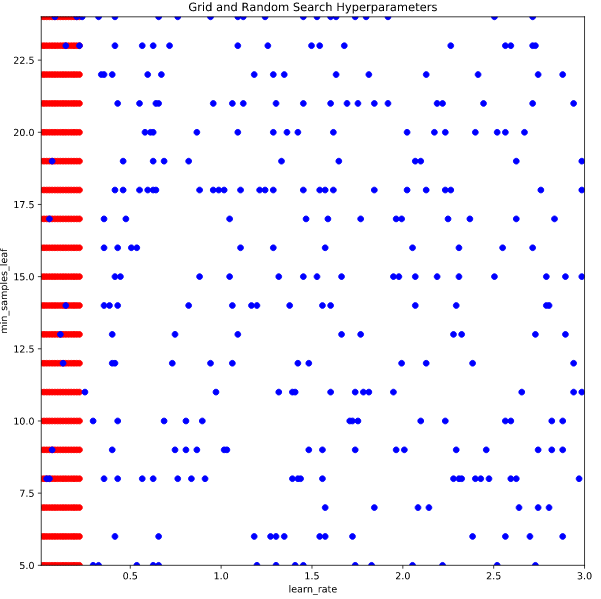

In [81]:
Image('ch3.5.png')

# 4.Informed Search

In this final chapter you will be given a taste of more advanced hyperparameter tuning methodologies known as ''informed search''. This includes a methodology known as Coarse To Fine as well as Bayesian & Genetic hyperparameter tuning algorithms. You will learn how informed search differs from uninformed search and gain practical skills with each of the mentioned methodologies, comparing and contrasting them as you go.

In [82]:
# Visualizing Coarse to Fine
# 
# You're going to undertake the first part of a Coarse to Fine search. 
# This involves analyzing the results of an initial random search that took place over a large search space, 
# then deciding what would be the next logical step to make your hyperparameter search finer.
# 
# You have available:
# 
# combinations_list - a list of the possible hyperparameter combinations the random search was undertaken on.
# results_df - a DataFrame that has each hyperparameter combination and the resulting accuracy of all 500 trials. 
# Each hyperparameter is a column, with the header the hyperparameter name.
# visualize_hyperparameter() - a function that takes in a column of the DataFrame (as a string) 
# and produces a scatter plot of this column's values compared to the accuracy scores. 
# An example call of the function would be visualize_hyperparameter('accuracy')
# 
# Instructions
# 
# Confirm (by printing out) the size of the combinations_list, justifying the need to start with a random search.
# Sort the results_df by accuracy values and print the top 10 rows. Are there clear insights? Beware a small sample size!
# Confirm (by printing out) which hyperparameters were used in this search. These are the column names in results_df.
# Call visualize_hyperparameter() with each hyperparameter in turn (max_depth, min_samples_leaf, learn_rate). 
# Are there any trends?

In [83]:
# # Confirm the size of the combinations_list
# print(len(combinations_list))
# 
# # Sort the results_df by accuracy and print the top 10 rows
# print(results_df.sort_values(by='accuracy', ascending=False).head(10))
# 
# # Confirm which hyperparameters were used in this search
# print(results_df.columns)
# 
# # Call visualize_hyperparameter() with each hyperparameter in turn
# visualize_hyperparameter('max_depth')
# visualize_hyperparameter('min_samples_leaf')
# visualize_hyperparameter('learn_rate')

In [84]:
# 10000
#     max_depth  min_samples_leaf  learn_rate  accuracy
# 1          10                14    0.477450        97
# 4           6                12    0.771275        97
# 2           7                14    0.050067        96
# 3           5                12    0.023356        96
# 5          13                11    0.290470        96
# 6           6                10    0.317181        96
# 7          19                10    0.757919        96
# 8           2                16    0.931544        96
# 9          16                13    0.904832        96
# 10         12                13    0.891477        96
# Index(['max_depth', 'min_samples_leaf', 'learn_rate', 'accuracy'], dtype='object')

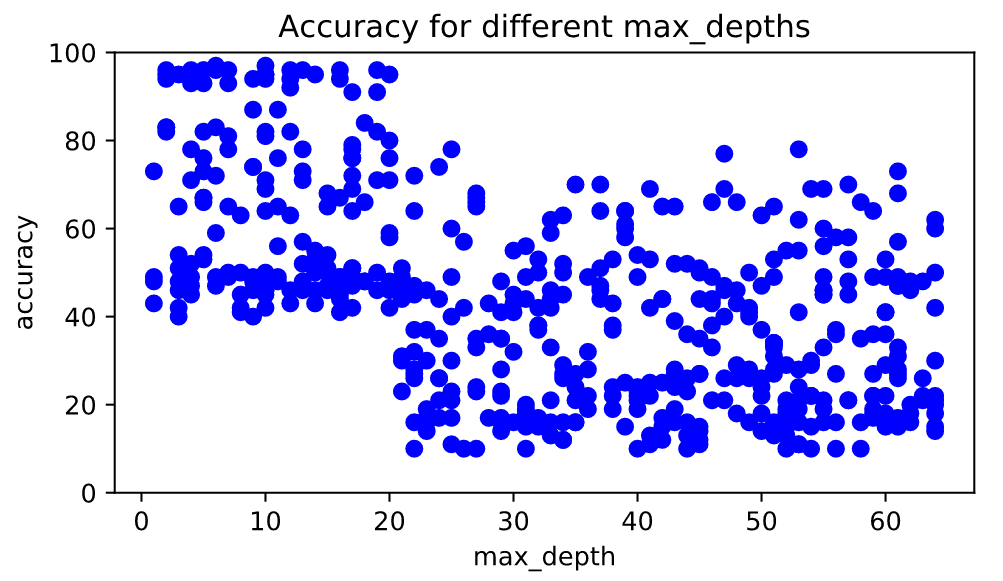

In [85]:
Image('ch4.1.png')

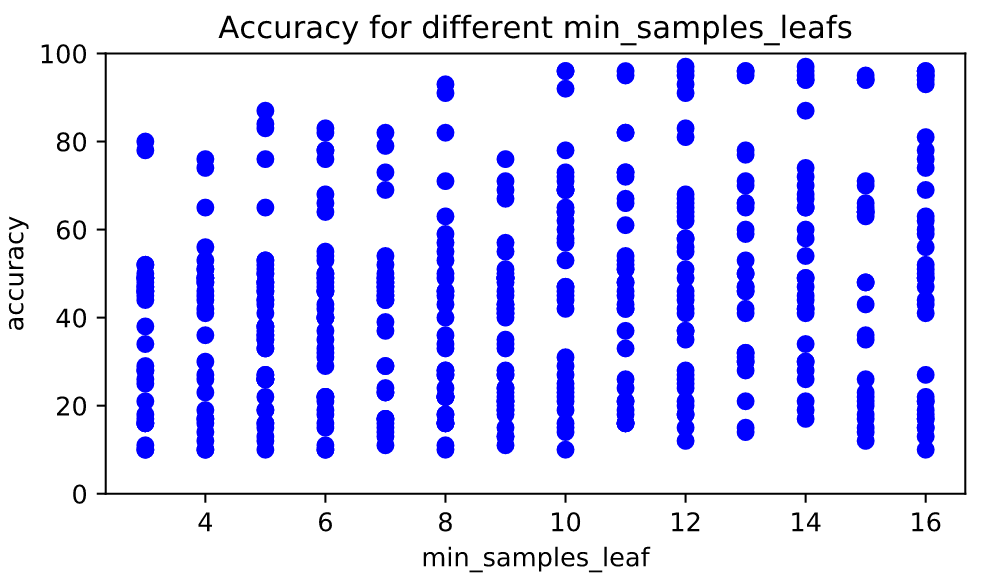

In [86]:
Image('ch4.2.png')

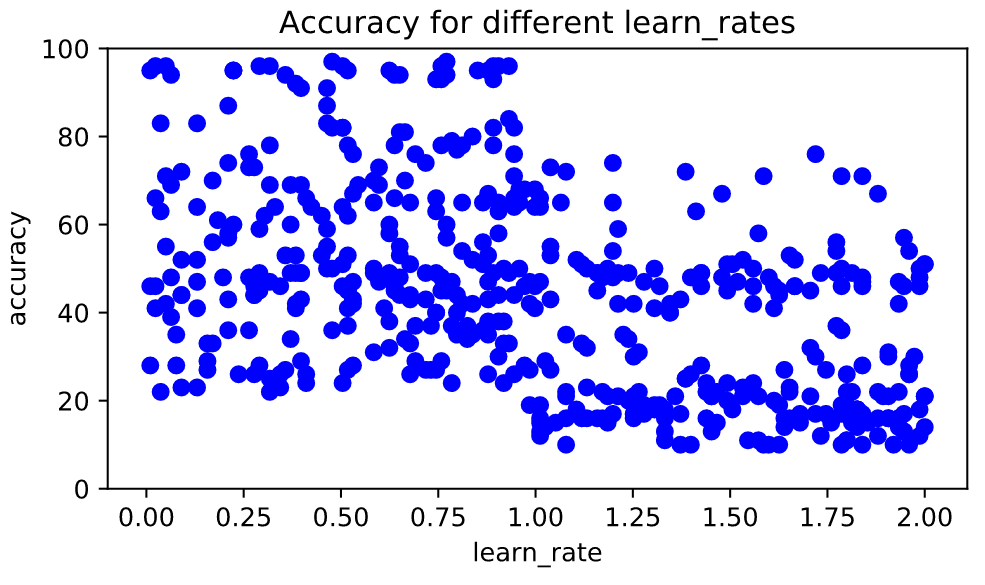

In [87]:
Image('ch4.3.png')

In [88]:
# Coarse to Fine Iterations
# 
# You will now visualize the first random search undertaken, construct a tighter grid and check the results. 
# You will have available:
# 
# results_df - a DataFrame that has the hyperparameter combination and the resulting accuracy of all 500 trials. 
# Only the hyperparameters that had the strongest visualizations from 
# the previous exercise are included (max_depth and learn_rate)
# 
# visualize_first() - This function takes no arguments but will visualize each of your hyperparameters 
# against accuracy for your first random search.
# 
# Instructions 1/3
# 
# Use the visualize_first() function to check the values of max_depth and learn_rate that tend to perform better. 
# A convenient red line will be added to make this explicit.

In [89]:
# # Use the provided function to visualize the first results
# visualize_first()

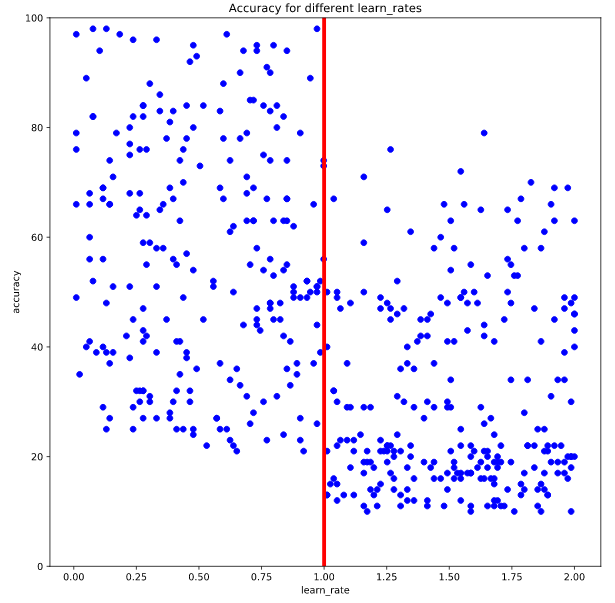

In [90]:
Image('ch4.4.png')

In [91]:
# 2. Now create a more narrow grid search, testing for max_depth values
# between 1 and 20 and for 50 learning rates between 0.001 and 1.

In [92]:
# # Use the provided function to visualize the first results
# # visualize_first()
# 
# # Create some combinations lists & combine
# max_depth_list = list(range(1, 21))
# learn_rate_list = np.linspace(0.001, 1, 50)

In [93]:
# # Use the provided function to visualize the first results
# # visualize_first()
# 
# # Create some combinations lists & combine
# max_depth_list = list(range(1, 21))
# learn_rate_list = np.linspace(0.001, 1, 50)

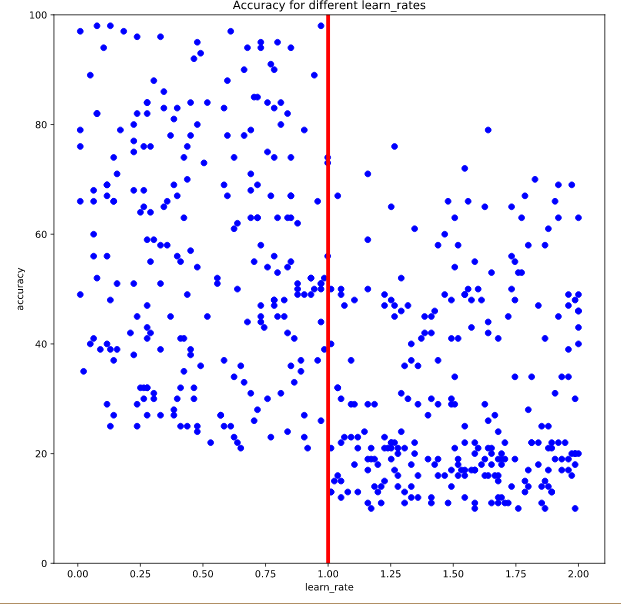

In [96]:
Image('ch4.5.png')

In [94]:
# 3. We ran the 1,000 model grid search in the background based on those new combinations.
# Now use the visualize_second() function to visualize the second iteration (grid search) 
# and see if there is any improved results.

In [95]:
# # Use the provided function to visualize the first results
# # visualize_first()
# 
# # Create some combinations lists & combine:
# max_depth_list = list(range(1,21))
# learn_rate_list = np.linspace(0.001,1,50)
# 
# # Call the function to visualize the second results
# visualize_second()

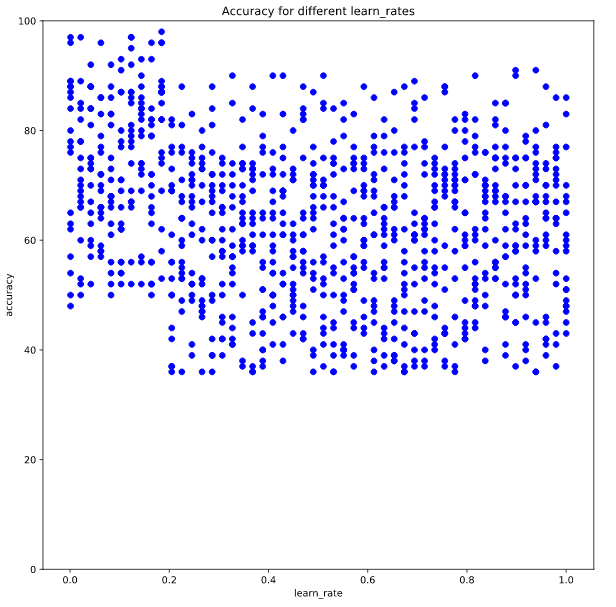

In [97]:
Image('ch4.6.png')

In [98]:
# Bayes Rule in Python
# 
# In this exercise you will undertake a practical example of setting up Bayes formula, 
# obtaining new evidence and updating your 'beliefs' in order to get a more accurate result. 
# The example will relate to the likelihood that someone will close their account for your online software product.
# 
# These are the probabilities we know:
# 
# 7% (0.07) of people are likely to close their account next month
# 15% (0.15) of people with accounts are unhappy with your product (you don't know who though!)
# 35% (0.35) of people who are likely to close their account are unhappy with your product
# Instructions 1/3
# 
# Assign the different probabilities (as decimals) to variables. p_unhappy is the likelihood someone is unhappy, 
# p_unhappy_close is the probability that someone is unhappy with the product, given they are going to close their account.
# 

In [99]:
# # Assign probabilities to variables 
# p_unhappy = 0.15
# p_unhappy_close = 0.35

In [100]:
# 2. Assign the probability that someone will close their account next month to the variable p_close as a decimal.

In [101]:
# # Assign probabilities to variables 
# p_unhappy = 0.15
# p_unhappy_close = 0.35
# 
# # Probabiliy someone will close
# p_close = 0.07

In [102]:
# You interview one of your customers and discover they are unhappy. 
# What is the probability they will close their account, now that you know this evidence?
# Assign the result to p_close_unhappy and print it.

In [103]:
# # Assign probabilities to variables 
# p_unhappy = 0.15
# p_unhappy_close = 0.35
# 
# # Probabiliy someone will close
# p_close = 0.07
# 
# # Probability unhappy person will close
# p_close_unhappy = (p_unhappy_close * p_close) / p_unhappy
# print(p_close_unhappy)

In [104]:
# 0.16333333333333336

In [105]:
# Bayesian Hyperparameter tuning with Hyperopt
# 
# In this example you will set up and run a bayesian hyperparameter optimization 
# process using the package Hyperopt (already imported as hp for you). 
# You will set up the domain (which is similar to setting up the grid for a grid search), 
# then set up the objective function. Finally, you will run the optimizer over 20 iterations.
# 
# You will need to set up the domain using values:
# 
# max_depth using quniform distribution (between 2 and 10, increasing by 2)
# learning_rate using uniform distribution (0.001 to 0.9)
# Note that for the purpose of this exercise, 
# this process was reduced in data sample size and hyperopt & GBM iterations. 
# If you are trying out this method by yourself on your own machine, try a larger search space, 
# more trials, more cvs and a larger dataset size to really see this in action!
# 
# Instructions
# 
# Set up a space dictionary using the domain mentioned above.
# Set up the objective function using a gradient boosting classifier.
# Run the algorithm for 20 evaluations (just use the default, suggested algorithm from the slides).

In [106]:
# # Set up space dictionary with specified hyperparameters
# space = {'max_depth': hp.quniform('max_depth', 2, 10, 2),'learning_rate': hp.uniform('learning_rate', 0.001, 0.9)}
# 
# # Set up objective function
# def objective(params):
#     params = {'max_depth': int(params['max_depth']),'learning_rate': params['learning_rate']}
#     gbm_clf = GradientBoostingClassifier(n_estimators=100, **params) 
#     best_score = cross_val_score(gbm_clf, X_train, y_train, scoring='accuracy', cv=2, n_jobs=4).mean()
#     loss = 1 - best_score
#     return loss
# 
# # Run the algorithm
# best = fmin(fn=objective,space=space, max_evals=20, rstate=np.random.RandomState(42), algo=tpe.suggest)
# print(best)

In [107]:
#  0%|          | 0/20 [00:00<?, ?it/s, best loss: ?]
#   5%|5         | 1/20 [00:00<00:03,  5.32it/s, best loss: 0.26759418985474637]
#  10%|#         | 2/20 [00:00<00:03,  5.21it/s, best loss: 0.2549063726593165] 
#  15%|#5        | 3/20 [00:00<00:03,  5.30it/s, best loss: 0.2549063726593165]
#  20%|##        | 4/20 [00:00<00:02,  5.36it/s, best loss: 0.2549063726593165]
#  25%|##5       | 5/20 [00:01<00:03,  3.93it/s, best loss: 0.2549063726593165]
#  30%|###       | 6/20 [00:01<00:03,  4.00it/s, best loss: 0.2549063726593165]
#  35%|###5      | 7/20 [00:01<00:02,  4.41it/s, best loss: 0.2549063726593165]
#  40%|####      | 8/20 [00:01<00:02,  4.64it/s, best loss: 0.2549063726593165]
#  45%|####5     | 9/20 [00:01<00:02,  4.91it/s, best loss: 0.2549063726593165]
#  50%|#####     | 10/20 [00:02<00:01,  5.26it/s, best loss: 0.2549063726593165]
#  55%|#####5    | 11/20 [00:02<00:01,  5.29it/s, best loss: 0.2549063726593165]
#  60%|######    | 12/20 [00:02<00:01,  4.95it/s, best loss: 0.2549063726593165]
#  65%|######5   | 13/20 [00:02<00:01,  4.61it/s, best loss: 0.2549063726593165]
#  70%|#######   | 14/20 [00:03<00:01,  3.05it/s, best loss: 0.2525688142203555]
#  75%|#######5  | 15/20 [00:03<00:01,  3.56it/s, best loss: 0.2525688142203555]
#  80%|########  | 16/20 [00:03<00:01,  3.85it/s, best loss: 0.2525688142203555]
#  85%|########5 | 17/20 [00:04<00:01,  2.86it/s, best loss: 0.24246856171404285]
#  90%|######### | 18/20 [00:04<00:00,  3.29it/s, best loss: 0.24246856171404285]
#  95%|#########5| 19/20 [00:04<00:00,  3.60it/s, best loss: 0.24246856171404285]
# 100%|##########| 20/20 [00:04<00:00,  3.74it/s, best loss: 0.24246856171404285]
# 100%|##########| 20/20 [00:04<00:00,  4.03it/s, best loss: 0.24246856171404285]
# {'learning_rate': 0.11310589268581149, 'max_depth': 6.0}

In [108]:
# Genetic Hyperparameter Tuning with TPOT
# 
# You're going to undertake a simple example of genetic hyperparameter tuning. 
# TPOT is a very powerful library that has a lot of features. 
# You're just scratching the surface in this lesson, but you are highly encouraged to explore in your own time.
# 
# This is a very small example. In real life, TPOT is designed to be run for many hours to find the best model. 
# You would have a much larger population and offspring size as well as hundreds more generations to find a good model.
# 
# You will create the estimator, fit the estimator to the training data and then score this on the test data.
# 
# For this example we wish to use:
# 
# 3 generations
# 4 in the population size
# 3 offspring in each generation
# accuracy for scoring
# A random_state of 2 has been set for consistency of results.
# 
# Instructions
# 
# Assign the values outlined in the context to the inputs for tpot_clf.
# Create the tpot_clf classifier with the correct inputs.
# Fit the classifier to the training data (X_train & y_train are available in your workspace).
# Use the fitted classifier to score on the test set (X_test & y_test are available in your workspace).

In [109]:
# # Assign the values outlined to the inputs
# number_generations = 3
# population_size = 4
# offspring_size = 3
# scoring_function = 'accuracy'
# 
# # Create the tpot classifier
# tpot_clf = TPOTClassifier(generations=number_generations, population_size=population_size, 
#                           offspring_size=offspring_size, scoring=scoring_function,
#                           verbosity=2, random_state=2, cv=2)
# 
# # Fit the classifier to the training data
# tpot_clf.fit(X_train, y_train)
# 
# # Score on the test set
# print(tpot_clf.score(X_test, y_test))

In [110]:
# Warning: xgboost.XGBClassifier is not available and will not be used by TPOT.
# Generation 1 - Current best internal CV score: 0.7575064376609415
# Generation 2 - Current best internal CV score: 0.7750693767344183
# Generation 3 - Current best internal CV score: 0.7750693767344183
# 
# Best pipeline: BernoulliNB(input_matrix, alpha=0.1, fit_prior=True)
# 0.76

In [111]:
# Analysing TPOT's stability
# You will now see the random nature of TPOT by constructing the classifier with different 
# random states and seeing what model is found to be best by the algorithm. 
# This assists to see that TPOT is quite unstable when not run for a reasonable amount of time.
# 
# Instructions 1/3
# XP
# 1
# Create the TPOT classifier, fit to the data and score using a random_state of 42.
# 
# 2
# Now try using a random_state of 122. The numbers don't mean anything special, but should produce different results.
# 3
# Finally try using the random_state of 99. See how there is a different result again?

In [112]:
# # Create the tpot classifier 
# tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3, scoring='accuracy', cv=2,
#                           verbosity=2, random_state=42)
# 
# # Fit the classifier to the training data
# tpot_clf.fit(X_train, y_train)
# 
# # Score on the test set
# print(tpot_clf.score(X_test, y_test))

In [113]:
# Warning: xgboost.XGBClassifier is not available and will not be used by TPOT.
#     Generation 1 - Current best internal CV score: 0.7549688742218555
#     Generation 2 - Current best internal CV score: 0.7549688742218555
#     
#     Best pipeline: DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=7, min_samples_leaf=11, min_samples_split=12)
#     0.75

In [114]:
# # Create the tpot classifier 
# tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3, scoring='accuracy', cv=2,
#                           verbosity=2, random_state=122)
# 
# # Fit the classifier to the training data
# tpot_clf.fit(X_train, y_train)
# 
# # Score on the test set
# print(tpot_clf.score(X_test, y_test))

In [115]:
# Warning: xgboost.XGBClassifier is not available and will not be used by TPOT.
#     Generation 1 - Current best internal CV score: 0.7675066876671917
#     Generation 2 - Current best internal CV score: 0.7675066876671917
#     
#     Best pipeline: KNeighborsClassifier(MaxAbsScaler(input_matrix), n_neighbors=57, p=1, weights=distance)
#     0.75

In [116]:
# # Create the tpot classifier 
# tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3, scoring='accuracy', cv=2,
#                           verbosity=2, random_state=99)
# 
# # Fit the classifier to the training data
# tpot_clf.fit(X_train, y_train)
# 
# # Score on the test set
# print(tpot_clf.score(X_test, y_test))

In [117]:
#Warning: xgboost.XGBClassifier is not available and will not be used by TPOT.
#Generation 1 - Current best internal CV score: 0.8075326883172079
#Generation 2 - Current best internal CV score: 0.8075326883172079
#
#Best pipeline: RandomForestClassifier(SelectFwe(input_matrix, alpha=0.033), bootstrap=False, criterion=gini, max_features=1.0, min_samples_leaf=19, min_samples_split=10, n_estimators=100)
#0.78

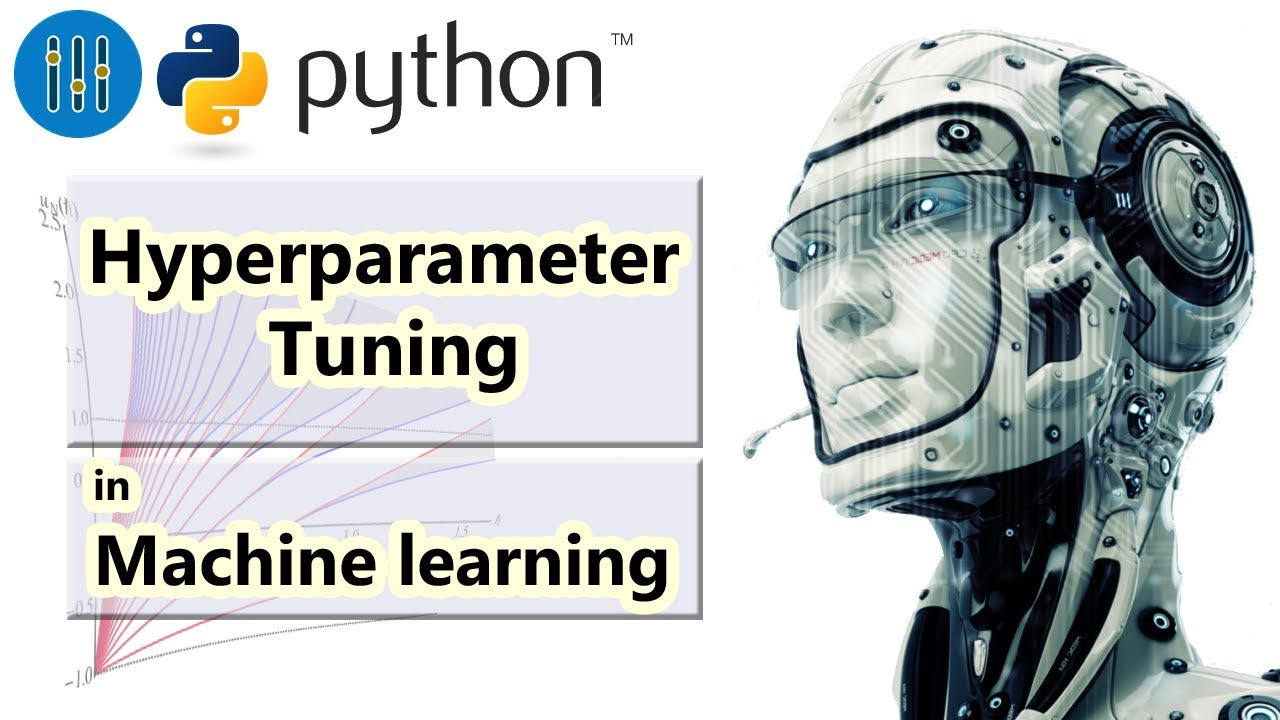

In [118]:
Image('ht.jpg')